In [1]:
%%html
<!--This is just for personal preference.-->
<style>
h1 {padding: 9px; color: Green; border-bottom: 3px solid Green; text-align: center;}
h2 {padding: 9px; color: MediumBlue; border-bottom: 3px solid MediumBlue; text-align: center;}
h3 {padding: 9px; color: firebrick; border-bottom: 3px solid firebrick; text-align: center;}
h4 {padding: 9px; color: olive; border-bottom: 3px solid olive; text-align: center;}
h5 {padding: 9px; color: aquamarine; border-bottom: 3px solid aquamarine; text-align: center;}
summary {color: DarkOrange;}
td {text-align: center;}
</style>

<h1 align='center'><strong><u>King County Development</u></strong></h1>

<p align="center">
    <center><img src="images/kc_dev_logo.png"></center>
</p>

<h4 align='center'><strong><em>An Academic Multiple Regression Analysis Project</em></strong></h4>
<h4 align='center'><strong><em>by <a href="www.linkedin.com/in/devin-sarnataro-0b639b148">Devin Sarnataro</a></em></strong></h4>
<h6 align='center'>October 2nd, 2022</h6>

<h1 align='center'><strong>Table of Contents</strong></h1>

* [Project Overview](#sect_proj_over)
* [Stakeholder & Business Problem](#sect_stake_1)
* [Understanding & Preparing the Data](#sect_under_prep_data_1)
    * [Importing the Necessary Modules and Functions](#sect_import)
    * [Exploring the Data](#sect_expl_data)
    * [Duplicated ID's](#sect_dupes)
* [Stakeholder and Business Problem Update](#sect_stake_biz_update)
* [Understanding & Preparing the Data (cont.)](#sect_under_prep_data_2)
    * [Features with Missing Data](#sect_missing)
    * [Feature Distribution Visualizations](#sect_dist_viz)
    * [Initial Correlation Examination](#sect_corr)
    * [Dummy Variable Creation](#sect_dummies)
    * [Preprocessed DataFrames](#sect_preproc)
* [Model Iterations](#sect_model_iter)
    * [Base Models](#sect_base_models)
    * [Full Models](#sect_full)
        * [All King County Full Model](#sub_sect_kc)
        * [Seattle Full Model](#sub_sect_seattle)
        * [Outside Seattle Full Model](#sub_sect_out_seattle)
* [Stakeholder and Business Problem Decision](#sect_stake_biz_decision)
* [Insights and Conclusions](#sect_insights_and_conclusions)
* [Future Investigations](#sect_fut_invest)

<a id='sect_proj_over'></a>

<h1 align='center'><strong>Project Overview</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;For this project, <a href='https://flatironschool.com/'>Flatiron School</a> provided me with a dataset of residential property sales in King County, Washington.
&ensp;We were instructed to create a hypothetical stakeholder, or client, and business problem that could be addressed with a multiple regression analysis, in contrast to the first project in which we were provided with both.
&ensp;For students who were struggling to define a stakeholder, they recommended a real estate agency that assists homeowners in selling their homes, with the specific business problem of providing the agency with the analysis necessary to tell their clients whether renovations really do increase the value of a house and if so, by how much.

&nbsp;&nbsp;&nbsp;&nbsp;Along with the dataset, Flatiron also provided me with a `.md` <a href="https://github.com/sarnadpy32/king_county_development/blob/master/data/column_names.md">file with the column names and a brief description of each column</a>.
&ensp;I've also included the columns and their descriptions below if you click on the collapsible section.

<details>
    <summary><center><strong>&mdash;&nbsp;&nbsp;&nbsp;&nbsp;Click Here to see the Column Names and Descriptions.&nbsp;&nbsp;&nbsp;&nbsp;&mdash;</strong></center></summary>

<table align='center' width='90%'>
    <thead>
        <tr><th><center>Column</center></th><th><center>Description</center></th><th><center>Additional Information</center></th></tr>
    </thead>
    <tbody>
        <tr><td><center><code>id</code></center></td><td><center>Unique identifier for a house</center></td></tr>
        <tr><td><center><code>date</code></center></td><td><center>Date house was sold</center></td></tr>
        <tr><td><center><code>price</code></center></td><td><center>Sale price<br>(prediction target)</center></td></tr>
        <tr><td><center><code>bedrooms</code></center></td><td><center>Number of bedrooms</center></td></tr>
        <tr><td><center><code>bathrooms</code></center></td><td><center>Number of bathrooms</center></td></tr>
        <tr><td><center><code>sqft_living</code></center></td><td><center>Square footage of living space in the home</center></td></tr>
        <tr><td><center><code>sqft_lot</code></center></td><td><center>Square footage of the lot</center></td></tr>
        <tr><td><center><code>floors</code></center></td><td><center>Number of floors (levels) in house</center></td></tr>
        <tr>
            <td><center><code>waterfront</code></center></td>
            <td><center>Whether the house is on a waterfront</center></td>
            <td><center><em>(Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts)</em></center></td>
        </tr>
        <tr>
            <td><center><code>view</code></center></td>
            <td><center>Quality of view from house</center></td>
            <td><center><em>(Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other)</em></center></td>
        </tr>
        <tr>
            <td><center><code>condition</code></center></td>
            <td><center>How good the overall condition of the house is. Related to maintenance of house.</center></td>
            <td><center><code>1 = Poor</code><br>Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.<br><br><code>2 = Fair</code><br>Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.<br><br><code>3 = Average</code><br>Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.<br><br><code>4 = Good</code><br>No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.<br><br><code>5 = Very Good</code><br>All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.</center></td>
        </tr>
        <tr>
            <td><center><code>grade</code></center></td>
            <td><center>Overall grade of the house. Related to the construction and design of the house.</center></td>
            <td><center><code>1-3</code><br>Falls short of minimum building standards. Normally cabin or inferior structure.<br><br><code>4</code><br>Generally older, low quality construction. Does not meet code.<br><br><code>5</code><br>Low construction costs and workmanship. Small, simple design.<br><br><code>6</code><br>Lowest grade currently meeting building code. Low quality materials and simple designs.<br><br><code>7</code><br>Average grade of construction and design. Commonly seen in plats and older sub-divisions.<br><br><code>8</code><br>Just above average in construction and design. Usually better materials in both the exterior and interior finish work.<br><br><code>9</code><br>Better architectural design with extra interior and exterior design and quality.<br><br><code>10</code><br>Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.<br><br><code>11</code><br>Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.<br><br><code>12</code><br>Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.<br><br><code>13</code><br>Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.</center></td>
        </tr>
        <tr><td><center><code>sqft_above</code></center></td><td><center>Square footage of house apart from basement</center></td></tr>
        <tr><td><center><code>sqft_basement</code></center></td><td><center>Square footage of the basement</center></td></tr>
        <tr><td><center><code>yr_built</code></center></td><td><center>Year when house was built</center></td></tr>
        <tr><td><center><code>yr_renovated</code></center></td><td><center>Year when house was renovated</center></td></tr>
        <tr><td><center><code>zipcode</code></center></td><td><center>ZIP Code used by the United States Postal Service</center></td></tr>
        <tr><td><center><code>lat</code></center></td><td><center>Latitude coordinate</center></td></tr>
        <tr><td><center><code>long</code></center></td><td><center>Longitude coordinate</center></td></tr>
        <tr><td><center><code>sqft_living15</code></center></td><td><center>The square footage of interior housing living space for the nearest 15 neighbors</center></td></tr>
        <tr><td><center><code>sqft_lot15</code></center></td><td><center>The square footage of the land lots of the nearest 15 neighbors</center></td></tr>
    </tbody>
</table>

</details>

&nbsp;&nbsp;&nbsp;&nbsp;Two of the columns, `condition` and `grade`, had categories that required me to check the King County Assessor’s <a href='https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r'>glossary of terms</a> to see what the entities within the columns specifically meant.
&ensp;I also used the opportunity to explore the site a little, and by doing so I was able to obtain a map of the county from the county government's <a href="https://gismaps.kingcounty.gov/iMap/">iMap</a> feature.
<br><br>
<details align='center'>
    <summary><center><strong>&mdash;&nbsp;&nbsp;&nbsp;&nbsp;Click Here to see a Map of King County.&nbsp;&nbsp;&nbsp;&nbsp;&mdash;</strong></center></summary>

<p align="center">
    <img src="images/king_county_imap.svg">
</p>
    
</details>

<a id='sect_stake_1'></a>

<h1 align='center'><strong>Stakeholder & Business Problem</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;Based on the project description, and prior to any exploration of the dataset, I already had real estate agency in mind as a client, but I didn’t want to limit myself before I began my analysis.
&ensp;My initial thoughts were that areas with rapidly increasing home prices would be useful to a real estate agency, while areas with homes prices that were stagnant, or were perhaps even decreasing, would be useful to a state government agency, or maybe even some sort of charitable organization.
&ensp;Those areas may be in need of economic development or support.
&ensp;Even if I did end up going with a real estate agency, I was hoping to provide my hypothetical client with insights concerning other possible revelations that could be attained through a thorough analysis of the data.
&ensp;So, I began my analysis without identifying a client or business problem, with the purpose of seeing what was possible first.

<a id='sect_under_prep_data_1'></a>

<h1 align='center'><strong>Understanding & Preparing the Data</strong></h1>

<a id='sect_import'></a>

<h2 align='center'><strong>Importing the Necessary Modules and Functions</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;I started by importing the modules and functions that I knew I would most likely need.
&ensp;If I needed to import any others at any point, I would come back here and add them to this cell to keep everything organized.
&ensp;I also created some output formatters that I commonly use so that I wouldn't have to rewrite them each time.

In [2]:
# Importing modules and functions

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

In [3]:
# Output formatters

bold_red = '\033[31m\033[1m'
every_off = '\033[0m'

print(bold_red +'Making sure '+ every_off +'they worked '+ bold_red +'as intended.'+ every_off)

Making sure they worked as intended.


<a id='sect_expl_data'></a>

<h2 align='center'><strong>Exploring the Data</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;I began my analysis by importing the dataset provided to me by <a href='https://flatironschool.com/'>Flatiron School</a>.
&ensp;I decided to sort the dataframe by `id`, as it would make identifying any potential duplicates easier.
&ensp;During my analysis, I also found out that there were 70 different ZIP codes, so I downloaded the free ZIP code database available at <a href='https://www.unitedstateszipcodes.org/zip-code-database/'>this page</a>, to replace the ZIP codes with the appropriate city names.
&ensp;This reduced the number of categories in the column to 24 and served as a more useful tool for analysis.

In [4]:
# Importing and investigating the data

kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data = kc_house_data.sort_values('id')

display(kc_house_data.head(3))
kc_house_data.info()

id       date     price  bedrooms  bathrooms  sqft_living  \
2495  1000102  4/22/2015  300000.0         6       3.00         2400   
2494  1000102  9/16/2014  280000.0         6       3.00         2400   
6729  1200019   5/8/2014  647500.0         4       1.75         2060   

      sqft_lot  floors waterfront  view  ...      grade sqft_above  \
2495      9373     2.0         NO  NONE  ...  7 Average       2400   
2494      9373     2.0        NaN  NONE  ...  7 Average       2400   
6729     26036     1.0        NaN  NONE  ...     8 Good       1160   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
2495            0.0     1991           0.0    98002  47.3262 -122.214   
2494            0.0     1991           0.0    98002  47.3262 -122.214   
6729          900.0     1947           0.0    98166  47.4444 -122.351   

      sqft_living15  sqft_lot15  
2495           2060        7316  
2494           2060        7316  
6729           2590       21891  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 2495 to 15937
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  lon

In [5]:
# Checking the number of different ZIP codes 

kc_house_data.zipcode.nunique()

70

In [6]:
# Importing an outside dataset to replace the ZIP codes

zip_code_data = pd.read_csv('data/zip_code_database.csv')

zip_code_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42724 entries, 0 to 42723
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zip                       42724 non-null  int64  
 1   type                      42724 non-null  object 
 2   decommissioned            42724 non-null  int64  
 3   primary_city              42724 non-null  object 
 4   acceptable_cities         9287 non-null   object 
 5   unacceptable_cities       11666 non-null  object 
 6   state                     42724 non-null  object 
 7   county                    41799 non-null  object 
 8   timezone                  41926 non-null  object 
 9   area_codes                39698 non-null  object 
 10  world_region              333 non-null    object 
 11  country                   42650 non-null  object 
 12  latitude                  42724 non-null  float64
 13  longitude                 42724 non-null  float64
 14  irs_es

In [7]:
# Setting up the outside dataset to easily use it to replace the ZIP codes with the their corresponding cities

zip_cities = zip_code_data[['zip', 'primary_city']].set_index('zip')

In [8]:
# Replacing the ZIP codes with the their corresponding cities

kc_house_data.zipcode = kc_house_data.zipcode.map(lambda x: zip_cities.loc[x]['primary_city'])

In [9]:
# Renaming the column

kc_house_data.rename(columns={'zipcode': 'city'}, inplace=True)

In [10]:
# Checking how effective replacing ZIP code with City was in reducing the number of categories 

kc_house_data.city.nunique()

24

<a id="sect_dupes"></a>

<h2 align='center'><strong>Duplicated ID's</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;I found out there were sales with duplicate `id`s.
&ensp;Before I could begin my analysis, I had to determine if these were resales or errors?
&ensp;I first changed the `date` column to make comparisons easier, and it also allowed me to easily see the period of time covered by the dataset, which was only a single year's worth of sales, specifically from May 2014 to May 2015.
&ensp;I then isolated all the duplicated `id`s into a single dataframe to investigate my concerns.
&ensp;After checking, they do seem do be resales and there were therefore no duplicates that needed to be dropped.

In [11]:
# There were obviously duplicates based on the number of unique ID's

kc_house_data.id.nunique()

21420

In [12]:
# Changing the date column to datetime format and aanlyzing the time period 

kc_house_data.date = pd.to_datetime(kc_house_data.date)

kc_house_data.date.describe(datetime_is_numeric=True)

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

In [13]:
# Isolating the potential duplicates in their own df

dup_df = kc_house_data.loc[kc_house_data.id.duplicated(keep=False)].copy()

In [14]:
# Investigating the maximum number of duplicated IDs

dup_df.id.value_counts().head(3)

795000620     3
1000102       2
5430300171    2
Name: id, dtype: int64

In [15]:
# Iterating through the unique IDs in the dup_df

for id_x in dup_df.id.unique():
    uniq_id_df = dup_df.loc[dup_df.id==id_x].sort_values('date')
    
    p_0, p_1 = uniq_id_df.price.iloc[0], uniq_id_df.price.iloc[1]
    
    d_0, d_1 = uniq_id_df.date.iloc[0], uniq_id_df.date.iloc[1]
    
    # Any duplicated `id`s that had a resale value of less than the orginal value were my primary
    # concern as these could be errors instead of resales and I didn't feel the need to check 
    # if the resale value was greater, which would make sense if people were quickly flipping 
    # houses / properties
    #--------------------------------------------------------------------------------------------
    if p_1 < p_0: display(uniq_id_df)
    
    # And of course, any properties that had both the same date and ID would almost certainly be errors
    #--------------------------------------------------------------------------------------------------
    if d_0 == d_1: 
        print('\n'+ bold_red +'X---Obvious Error---X'+ every_off +'\n')
        display(uniq_id_df)
        
    # As there was only one duplicated ID with three duplicates, it was of obvious concern as well
    #---------------------------------------------------------------------------------------------
    if len(uniq_id_df)==3: display(uniq_id_df)

id       date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620 2014-09-24  115000.0         3        1.0         1080   
17589  795000620 2014-12-15  124000.0         3        1.0         1080   
17590  795000620 2015-03-11  157000.0         3        1.0         1080   

       sqft_lot  floors waterfront  view  ...   grade sqft_above  \
17588      6250     1.0         NO  NONE  ...  5 Fair       1080   
17589      6250     1.0         NO  NONE  ...  5 Fair       1080   
17590      6250     1.0        NaN  NONE  ...  5 Fair       1080   

       sqft_basement yr_built  yr_renovated     city      lat    long  \
17588            0.0     1950           0.0  Seattle  47.5045 -122.33   
17589            0.0     1950           0.0  Seattle  47.5045 -122.33   
17590            0.0     1950           NaN  Seattle  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
15263  2619920170 2014-10-01  772500.0         4        2.5         3230   
15264  2619920170 2014-12-19  765000.0         4        2.5         3230   

       sqft_lot  floors waterfront  view  ...     grade sqft_above  \
15263      4290     2.0         NO  NONE  ...  9 Better       3230   
15264      4290     2.0         NO  NONE  ...  9 Better       3230   

       sqft_basement yr_built  yr_renovated      city      lat     long  \
15263            0.0     2004           0.0  Kirkland  47.6874 -122.161   
15264            0.0     2004           NaN  Kirkland  47.6874 -122.161   

       sqft_living15  sqft_lot15  
15263           3220        5083  
15264           3220        5083  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
5587  2726049071 2014-12-11  510000.0         2        1.0          820   
5588  2726049071 2015-04-08  489950.0         2        1.0          820   

      sqft_lot  floors waterfront  view  ...   grade sqft_above  \
5587      4206     1.0        NaN  NONE  ...  5 Fair        820   
5588      4206     1.0         NO  NONE  ...  5 Fair        820   

      sqft_basement yr_built  yr_renovated     city      lat     long  \
5587            0.0     1949           0.0  Seattle  47.7076 -122.284   
5588            0.0     1949           NaN  Seattle  47.7076 -122.284   

      sqft_living15  sqft_lot15  
5587           1810        7200  
5588           1810        7200  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
10598  2767603612 2014-05-12  500000.0         2       2.25         1290   
10599  2767603612 2015-01-13  489000.0         2       2.25         1290   

       sqft_lot  floors waterfront  view  ...   grade sqft_above  \
10598      1334     3.0         NO  NONE  ...  8 Good       1290   
10599      1334     3.0         NO  NONE  ...  8 Good       1290   

       sqft_basement yr_built  yr_renovated     city      lat     long  \
10598            0.0     2007           0.0  Seattle  47.6719 -122.382   
10599            0.0     2007           NaN  Seattle  47.6719 -122.382   

       sqft_living15  sqft_lot15  
10598           1350        1334  
10599           1350        1334  

[2 rows x 21 columns]

id       date      price  bedrooms  bathrooms  sqft_living  \
7838  4139420590 2014-05-20  1210000.0         4        3.5         4560   
7839  4139420590 2014-08-27  1200000.0         4        3.5         4560   

      sqft_lot  floors waterfront  view  ...      grade sqft_above  \
7838     16643     1.0         NO  GOOD  ...  12 Luxury       2230   
7839     16643     1.0         NO  GOOD  ...  12 Luxury       2230   

      sqft_basement yr_built  yr_renovated      city      lat     long  \
7838         2330.0     1995           0.0  Bellevue  47.5521 -122.115   
7839         2330.0     1995           0.0  Bellevue  47.5521 -122.115   

      sqft_living15  sqft_lot15  
7838           4060       15177  
7839           4060       15177  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
13285  7167000040 2014-08-13  740000.0         4        3.0         3350   
13286  7167000040 2015-03-05  700000.0         4        3.0         3350   

       sqft_lot  floors waterfront  view  ...         grade sqft_above  \
13285    199253     2.0        NaN  NONE  ...  10 Very Good       3350   
13286    199253     2.0         NO  NONE  ...  10 Very Good       3350   

       sqft_basement yr_built  yr_renovated           city      lat     long  \
13285            0.0     2004           0.0  Black Diamond  47.3602 -121.988   
13286            0.0     2004           0.0  Black Diamond  47.3602 -121.988   

       sqft_living15  sqft_lot15  
13285           3350      183897  
13286           3350      183897  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
836  8682262400 2014-07-18  430000.0         2       1.75         1350   
837  8682262400 2015-05-13  419950.0         2       1.75         1350   

     sqft_lot  floors waterfront  view  ...   grade sqft_above  sqft_basement  \
836      4003     1.0         NO  NONE  ...  8 Good       1350            0.0   
837      4003     1.0         NO  NONE  ...  8 Good       1350            0.0   

    yr_built  yr_renovated     city      lat     long  sqft_living15  \
836     2004           0.0  Redmond  47.7176 -122.033           1350   
837     2004           0.0  Redmond  47.7176 -122.033           1350   

     sqft_lot15  
836        4479  
837        4479  

[2 rows x 21 columns]

<a id='sect_stake_biz_update'></a>

<h1 align='center'><strong>Stakeholder and Business Problem Update</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;As I mentioned in the section above, I discovered that the period of time covered by the dataset was only a single year.
&ensp;My original idea of analyzing the prices of houses in certain areas over time was therefore not going to work, nor any other analysis of the changing effects of the other features over time.
&ensp;While my options for a client were still open, I was going to have to perform an analysis of the effect of the features themselves on the prices of houses in the year concerned.

<a id='sect_under_prep_data_2'></a>

<h1 align='center'><strong>Understanding & Preparing the Data (cont.)</strong></h1>

<a id='sect_missing'></a>

<h2 align='center'><strong>Features with Missing Data</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;I started by identifying the columns with missing data.
&ensp;Since there were only 63 entries missing a value in the `view` column, I decided to just drop those entries.
&ensp;I then used the `MissingIndicator()` function from `sklearn` to create an encoded column to be added to the DataFrame for each of the columns that held missing data.
&ensp;I could then fill in the `NaN`'s of those columns with something appropriate so that they wouldn't cause problems during my analysis.
&ensp;For the `waterfront` column, I then used the `OrdinalEncoder()` from `sklearn` to code and replace the column in a binary format.

In [16]:
# Determining which columns have missing data

kc_cols_missing = kc_house_data.isna().sum()
kc_cols_missing.loc[kc_cols_missing != 0]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [17]:
# Just got rid of the 63 entries with a missing 'view' value

kc_house_data.dropna(subset=['view'], inplace=True)

# Looping through the two columsns that still had missing data
# Encodding the missing values in separate columns
# Filling the missing values with an appropriate value
# An since the 'waterfront' column is binary, encoded it as such
#---------------------------------------------------------------

for col in ['waterfront', 'yr_renovated']:
    
    col_ser = kc_house_data[[col]].copy()
    missing_indicator = MissingIndicator()
    missing_indicator.fit(col_ser)
    missing_ser = missing_indicator.transform(col_ser).astype(int)
    
    if col == 'waterfront': 
        col_ser[col].fillna('NO', inplace=True)
        ord_encoder = OrdinalEncoder(dtype='int64')
        ord_encoder.fit(col_ser)
        enc_ord_col_ser = ord_encoder.transform(col_ser).flatten()
        kc_house_data[col] = enc_ord_col_ser
        
    if col == 'yr_renovated': kc_house_data[col].fillna(0, inplace=True)

    kc_house_data[col +'_Missing'] = missing_ser

&nbsp;&nbsp;&nbsp;&nbsp;I found out later that the `sqft_basement` column also contained a value that was basically equivalent to `NaN`.
&ensp;I came back here to deal with it in the same section.

In [18]:
# Repeating the process above but I had to replace the '?'s first

kc_house_data.sqft_basement = \
kc_house_data.sqft_basement.map(lambda x: np.nan if x=='?' else x)

sqft_base_col = kc_house_data[['sqft_basement']]

missing_indicator = MissingIndicator()
missing_indicator.fit(sqft_base_col)
missing_ser = missing_indicator.transform(sqft_base_col).astype(int)

kc_house_data['sqft_basement_Missing'] = missing_ser

kc_house_data.sqft_basement = kc_house_data.sqft_basement.astype('float64')

&nbsp;&nbsp;&nbsp;&nbsp;I then dropped the `id`, `date`, `lat`, and `long` columns as they were no longer necessary for my analysis.
&ensp;The `date`, `lat`, and `long` columns were all inappropriate to use as parameters in the model at this point, and the `id` column is inappropriate for linear models in general.

In [19]:
# Dropping the unnecessary columns

kc_house_data.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;Then I split the data into the target (dependent variable) series and two separate dataframes for the independent variables, one for the numerical independent variables, and one for the categorical independent variables.

In [20]:
# Creating the lists of columns for each group

numericals = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 
              'floors', 'sqft_basement', 'bedrooms', 'bathrooms']

categoricals = [col for col in kc_house_data.columns if col not in numericals and col!='price']

In [21]:
# Splitting the data into appropriate groups

kc_target = kc_house_data['price'].copy()
kc_nums = kc_house_data[numericals].copy() 
kc_cats = kc_house_data[categoricals].copy()

<a id='sect_dist_viz'></a>

<h2 align='center'><strong>Feature Distribution Visualizations Exploration</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;Before I created any visualizations, I wrote functions to properly format the ticks of any visualizations and any `pandas` outputs that contained currency information, as well as a function to get a lighter version of a simple, pre-named color to use in visualizations.

In [22]:
# Setting the rcParams that I wanted to use
# Creating the functions I would use to style colors, ticks and dataframes

plt.rcParams.update({'mathtext.fontset':'dejavuserif', 'mathtext.bf':'serif:bold'})

def get_lighter_color(color_name, light_frac):
    color_map = LinearSegmentedColormap.from_list('', [color_name,'w'], N=9)
    return color_map(light_frac)

def viz_percentage_formatter(y, pos):
    if y==0: c = '$\mathbf{0\%}$'
    else: c = '$\mathbf{'+ '{:.2f}'.format(y * 100) +'\%}$'

    return c

def viz_currency_formatter(x, pos):
    if x==0: c = '0'
    if 0<np.abs(x)<1e3: c = '${}'.format(np.abs(x))
    if 1e3<=np.abs(x)<1e6: c = '${}K'.format(round(np.abs(x)*1e-3), 2)
    if 1e6<=np.abs(x)<1e9: c = '${}M'.format(round(np.abs(x)*1e-6), 2)
    if np.abs(x)>=1e9: c = '${}B'.format(round(np.abs(x)*1e-9), 2)
        
    if x < 0: c = '-'+ c
        
    return c

def pd_currency_formatter(x):
    if x==0: c = '0'
    if 0<np.abs(x)<1e3: c = '${:f}'.format(np.abs(x))
    if 1e3<=np.abs(x)<1e6: c = '${:f}K'.format(round(np.abs(x)*1e-3), 2)
    if 1e6<=np.abs(x)<1e9: c = '${:f}M'.format(round(np.abs(x)*1e-6), 2)
    if np.abs(x)>=1e9: c = '${:f}B'.format(round(np.abs(x)*1e-9), 2)
        
    if x < 0: c = '-'+ c
        
    return c

<h3 align='center'><strong>Price Distribution Visualizations</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;I first checked the distribution of `price` (the target variable).

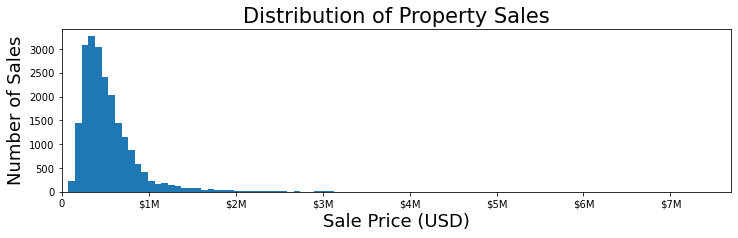

In [23]:
# Price Distribution Visualization

p_max = kc_target.max()

fig, ax = plt.subplots(figsize=(12, 3))

ax.hist(kc_target, bins=100)

ax.set_xbound(0, p_max)
ax.xaxis.set_major_formatter(viz_currency_formatter)

ax.set_xlabel("Sale Price (USD)", size=18)
ax.set_ylabel("Number of Sales", size=18)
ax.set_title("Distribution of Property Sales", size=21)

fig.set_facecolor('w')

fig.savefig('visuals/price_distribution.png' , bbox_inches='tight')

plt.show()

In [24]:
# Checking the distrubition thru .describe() to confirm the heavy skew

kc_target.describe().apply(pd_currency_formatter)

count     $22.000000K
mean     $540.000000K
std      $366.000000K
min       $78.000000K
25%      $322.000000K
50%      $450.000000K
75%      $645.000000K
max        $8.000000M
Name: price, dtype: object

&nbsp;&nbsp;&nbsp;&nbsp;There seemed to be a heavy skew which was confirmed by the large difference between the 75th quantile and the max value for the series.
&ensp;I eliminated the outliers so that the performance of the model would be improved.

In [25]:
# Eliminating the outliers

kc_target = kc_target.loc[(kc_target >= kc_target.quantile(.001)) & (kc_target <= kc_target.quantile(.999))]

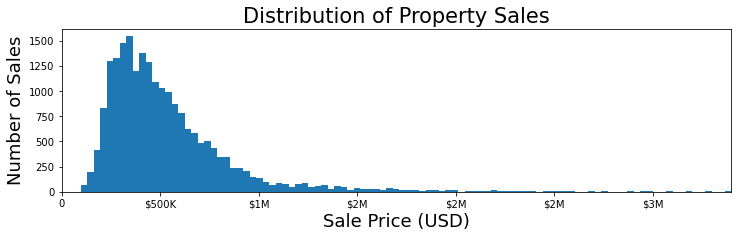

In [26]:
# Re-creating the distribution visualization again with the outliers removed

p_max = kc_target.max()

fig, ax = plt.subplots(figsize=(12, 3))

ax.hist(kc_target, bins=100)

ax.set_xbound(0, p_max)
ax.xaxis.set_major_formatter(viz_currency_formatter)

ax.set_xlabel("Sale Price (USD)", size=18)
ax.set_ylabel("Number of Sales", size=18)
ax.set_title("Distribution of Property Sales", size=21)

fig.set_facecolor('w')

fig.savefig('visuals/price_distribution_2.png' , bbox_inches='tight')

plt.show()

<h3 align='center'><strong>Numerical Features Distribution Visualizations</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;I then created visualizations to explore the distributions of the numerical features.

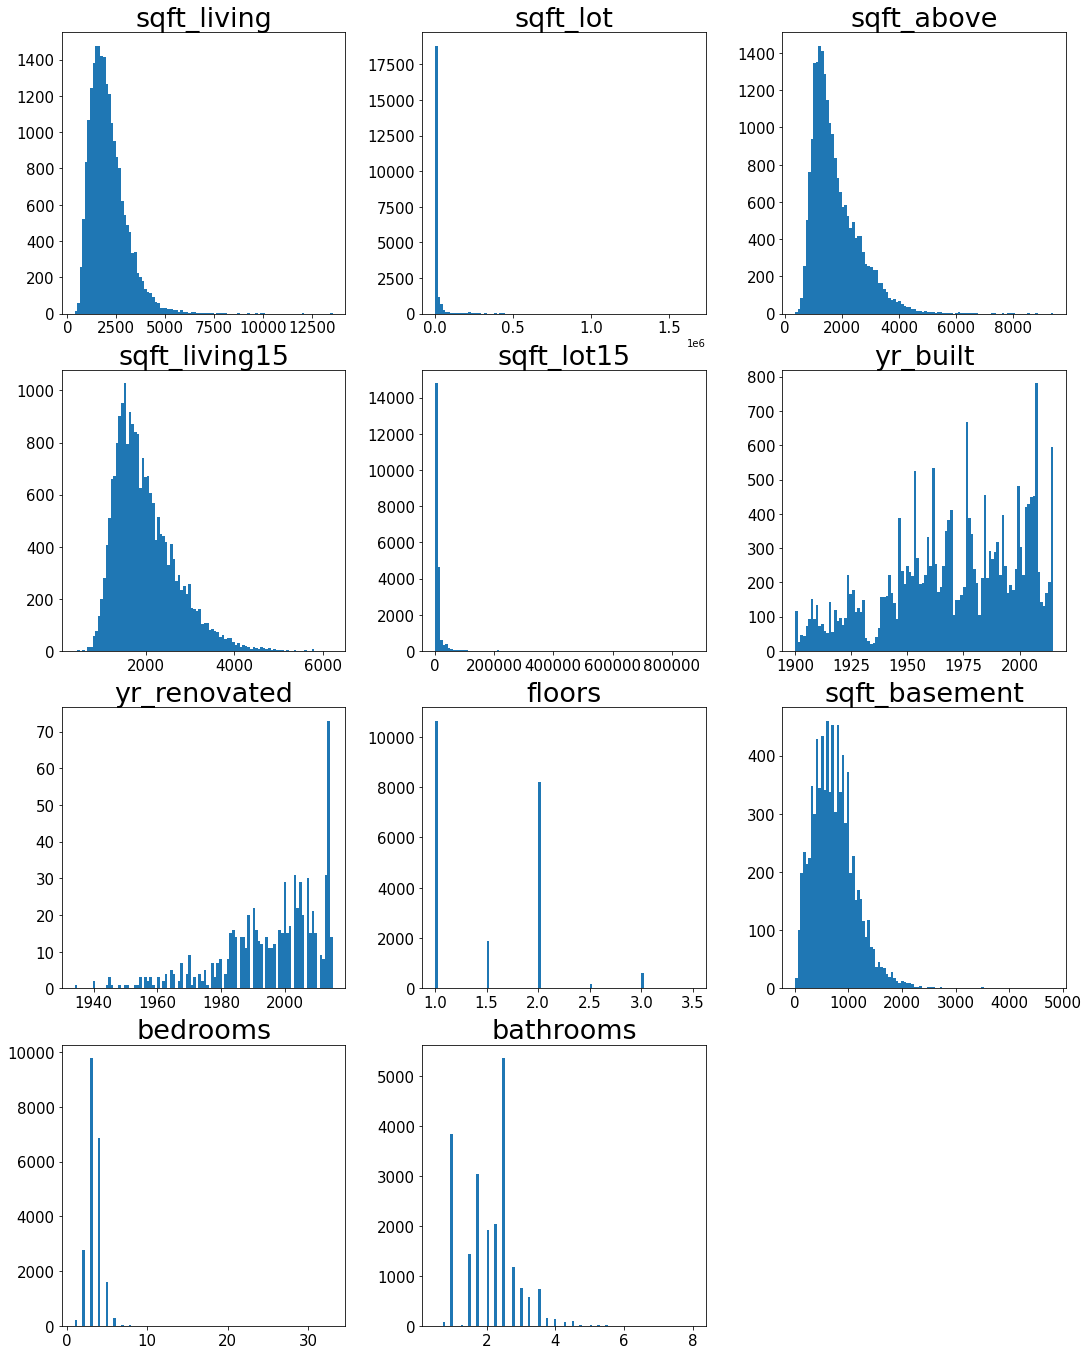

In [27]:
# Checking the distributions of the categorical features, which I changed accordingly after seeing the results

nums = len(kc_nums.columns)
n_rows = int(nums / 2)#

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), 
                        gridspec_kw={'wspace': .27})
axs = axs.flatten()

for c_i, col in enumerate(kc_nums.columns):
    
#     axs[c_i].hist(kc_nums[col], bins=100) # INITIAL EXPLORATION

    # Comment the following IF...ELSE statement and uncomment the line above to see the original
    # distributions
    #--------------------------------------------------------------------------------------------
    if col not in ['sqft_lot', 'sqft_basement', 'sqft_lot15', 'yr_renovated']: 
        axs[c_i].hist(kc_nums[col], bins=100)
        
    else: axs[c_i].hist(kc_nums[col].loc[kc_nums[col] != 0], bins=100)
    #--------------------------------------------------------------------------------------------
    axs[c_i].set_title(col, size=27)
    axs[c_i].tick_params('both', labelsize=15)
    
fig.set_facecolor('w')
[ax.set_visible(False) for ax in axs if not ax.has_data()]

fig.savefig('visuals/numeric_features_distributions.png' , bbox_inches='tight')

plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;There seemed to be spikes at `0` for the columns `sqft_lot`, `sqft_basement`, `sqft_lot15`, and `yr_renovated`.
&ensp;By eliminating the `0`'s in the distribution visualizations for those columns, I determined that the `sqft_basement` and `yr_renvoated` columns were heavily affected by removing the `0`'s, while the other two were not as clearly affected.
&ensp;It was therefore useful to turn the `sqft_basement` and `yr_renovated` into categorical features by either turning them into binary encoded features, or by splitting them into more complex categorical features.

&nbsp;&nbsp;&nbsp;&nbsp;I initially explored turning them into more complex categorical features, but in the end, I decided to just turn them into binary features.

In [28]:
# Turning the 'sqft_basement' and 'yr_renovated' columns into binary features

kc_nums.sqft_basement = kc_nums.sqft_basement.map(lambda x: 1 if x!=0 else x).astype(int)
kc_nums.yr_renovated = kc_nums.yr_renovated.map(lambda x: 1 if x!=0 else x).astype(int)

&nbsp;&nbsp;&nbsp;&nbsp;I then switched the three  columns I had restructured from the numerical features dataframe to the categorical features dataframe.

In [29]:
# I needed to see where to insert the columns

kc_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 2495 to 15937
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   waterfront             21534 non-null  int64 
 1   view                   21534 non-null  object
 2   condition              21534 non-null  object
 3   grade                  21534 non-null  object
 4   city                   21534 non-null  object
 5   waterfront_Missing     21534 non-null  int32 
 6   yr_renovated_Missing   21534 non-null  int32 
 7   sqft_basement_Missing  21534 non-null  int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 1.2+ MB


In [30]:
# Switching the columns from the numerical features to the categorical features

kc_cats.insert(5, 'basement', kc_nums.sqft_basement)
kc_cats.insert(6, 'renovated', kc_nums.yr_renovated)

kc_nums.drop(['sqft_basement', 'yr_renovated'], axis=1, inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;I again eliminated any outliers to improve the performance of the model.

In [31]:
# Seeing the distrubution of the the remaining numerical features, showing they all basically had outliers

kc_nums.describe()

sqft_living      sqft_lot    sqft_above  sqft_living15     sqft_lot15  \
count  21534.000000  2.153400e+04  21534.000000   21534.000000   21534.000000   
mean    2079.827854  1.509060e+04   1788.557537    1986.299944   12751.079502   
std      917.446520  4.138021e+04    827.745641     685.121001   27255.483308   
min      370.000000  5.200000e+02    370.000000     399.000000     651.000000   
25%     1430.000000  5.040000e+03   1190.000000    1490.000000    5100.000000   
50%     1910.000000  7.617000e+03   1560.000000    1840.000000    7620.000000   
75%     2550.000000  1.068775e+04   2210.000000    2360.000000   10083.000000   
max    13540.000000  1.651359e+06   9410.000000    6210.000000  871200.000000   

           yr_built        floors      bedrooms     bathrooms  
count  21534.000000  21534.000000  21534.000000  21534.000000  
mean    1971.002275      1.494126      3.373038      2.115712  
std       29.376044      0.539806      0.926410      0.768602  
min     1900.000000      1.000000      1.000000      0.500000  
25%     1951.000000      1.000000      3.000000      1.750000  
50%     1975.000000      1.500000      3.000000      2.250000  
75%     1997.000000      2.000000      4.000000      2.500000  
max     2015.000000      3.500000     33.000000      8.000000

In [32]:
# Removing the outliers for all the numerical features

for n_col in kc_nums.columns:
    kc_nums = \
    kc_nums.loc[(kc_nums[n_col] >= kc_nums[n_col].quantile(.001)) & (kc_nums[n_col] <= kc_nums[n_col].quantile(.999))]

In [33]:
# Checking the results, which made things at least somewhat better

kc_nums.describe()

sqft_living       sqft_lot    sqft_above  sqft_living15  \
count  21279.000000   21279.000000  21279.000000   21279.000000   
mean    2067.101744   13951.586400   1777.229334    1982.012595   
std      869.249044   30476.339079    789.855994     668.130370   
min      570.000000     713.000000    570.000000     750.000000   
25%     1430.000000    5041.000000   1200.000000    1490.000000   
50%     1910.000000    7603.000000   1560.000000    1840.000000   
75%     2540.000000   10584.000000   2200.000000    2360.000000   
max     7100.000000  493534.000000   5530.000000    4920.000000   

          sqft_lot15      yr_built        floors      bedrooms     bathrooms  
count   21279.000000  21279.000000  21279.000000  21279.000000  21279.000000  
mean    12090.615113   1970.934113      1.490883      3.370929      2.106831  
std     22379.965811     29.308507      0.537670      0.884038      0.744401  
min       914.000000   1900.000000      1.000000      1.000000      0.750000  
25%      5100.000000   1952.000000      1.000000      3.000000      1.750000  
50%      7620.000000   1975.000000      1.500000      3.000000      2.250000  
75%     10035.000000   1996.000000      2.000000      4.000000      2.500000  
max    283140.000000   2015.000000      3.000000      8.000000      5.000000

<a id='sub_sect_cat_feat_dist_viz'></a>

<h3 align='center'><strong>Categorical Features Distribution Visualizations</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;After the numerical features were taken care of, I checked the distribution of the categorical variables.
&ensp;These would have to be encoded in an appropriate manner to be used in my model.

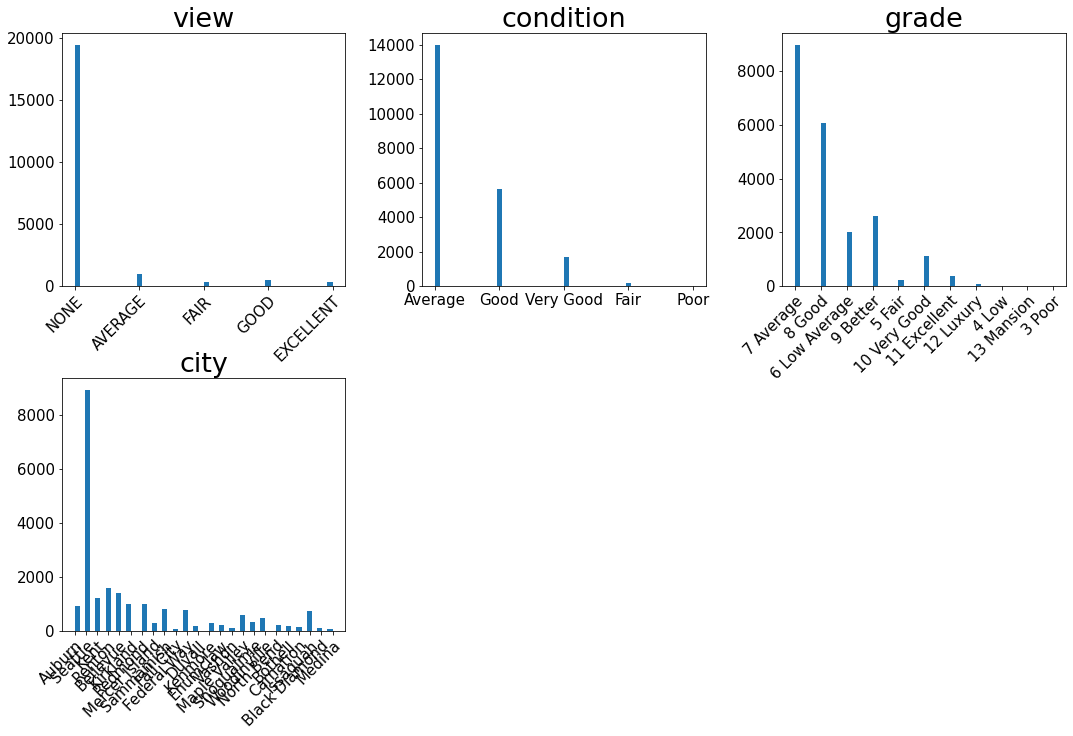

waterfront  basement  renovated  waterfront_Missing  yr_renovated_Missing  \
0       21389     12798      20791               19164                 17704   
1         145      8736        743                2370                  3830   

   sqft_basement_Missing  
0                  21082  
1                    452

In [34]:
# Creating both distribution visualizations for the non-binary features, 
# and a dataframe of the binary feature distrubitions

cats = len(kc_cats.columns)
n_rows = int(cats / 2)

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), 
                        gridspec_kw={'wspace': .27, 'hspace': .36})
axs = axs.flatten()

only_2_vals_df = pd.DataFrame()
empty_i = 0
for c_i, cat in enumerate(kc_cats.columns):
    
    ax_i = c_i if empty_i==0 else c_i - empty_i
    
    if kc_cats[cat].nunique() > 2:
        axs[ax_i].hist(kc_cats[cat], bins=50)
        axs[ax_i].set_title(cat, size=27)
        axs[ax_i].tick_params('both', labelsize=15)
        
        if cat in ['grade', 'view', 'city', 'yr_renovated', 'yr_built', 'sqft_basement']:
            plt.setp(axs[ax_i].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top')
    else: 
        empty_i += 1
        only_2_vals_df = pd.concat([only_2_vals_df, kc_cats[cat].value_counts()], axis=1)

fig.set_facecolor('w')
[ax.set_visible(False) for ax in axs if not ax.has_data()]

fig.savefig('visuals/categorical_features_distributions.png' , bbox_inches='tight')

plt.show()

display(only_2_vals_df)

&nbsp;&nbsp;&nbsp;&nbsp;I found out later that empty spaces in the values of a column caused problems during my analysis.
&ensp;Also, if you look at the visualizations above, you can see that the `xticklabels` in the visualizations for the distributions of `grade`, `condition`, `view`, and `yr_built` seem to be out of order.

&nbsp;&nbsp;&nbsp;&nbsp;I therefore figured this would be an appropriate place to eliminate the spaces in the values of the `grade`, `condition`, and `city` columns, as well as creating the sorting dictionaries I previously mentioned for the `grade`, `condition`, and `view` columns so that I could sort their `xticklabels`, as well as their dummy columns.

In [35]:
# Making the changes necessary for the `sklearn` functions to work properly

kc_cats.grade = kc_cats.grade.map(lambda x: x.replace(' ', '_'))
kc_cats.condition = kc_cats.condition.map(lambda x: x.replace(' ', '_'))
kc_cats.city = kc_cats.city.map(lambda x: x.replace(' ', '_'))

In [36]:
# Creating dictionaries to use later for sorting and other purposeses

grade_dict = {'3_Poor':1, '4_Low':2, '5_Fair':3, '6_Low_Average':4, '7_Average':5, '8_Good':6, 
              '9_Better':7, '10_Very_Good':8, '11_Excellent':9, '12_Luxury':10, '13_Mansion':11}

cond_dict = {'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very_Good':5}

view_dict = {'NONE':1, 'FAIR':2, 'AVERAGE':3, 'GOOD':4, 'EXCELLENT':5}

all_dicts = {'grade': grade_dict, 'condition': cond_dict, 'view': view_dict}

&nbsp;&nbsp;&nbsp;&nbsp;By analyzing the `value_counts()` for each categorical column, I found that there were some categories with less than 10 entries associated with them.
&ensp;I thought of these as the outliers of the categorical features, and I dropped them accordingly.

In [37]:
# Gerneating details on the non-binary columns and their categories, 
# while also creating a dictionary of low frequency categories

low_freq_cats = {}

for c_i, cat in enumerate(kc_cats.columns):
    n_cats = kc_cats[cat].nunique()
    cat_type = kc_cats[cat].dtype
    
    if cat_type!=object and n_cats>2:        
        num_cats = kc_cats[cat].value_counts().sort_index()
        low_cats = num_cats.loc[num_cats < 10].index
        for l_cat in low_cats: 
            if cat not in low_freq_cats.keys(): low_freq_cats[cat] = [l_cat]
            else: low_freq_cats[cat].append(l_cat)
                
        print(bold_red + str(c_i) +' - '+ cat + every_off +':\tnum_vals = '+ str(n_cats), cat_type)
        print(list(num_cats.index), '\n')
        
    if cat_type==object:
        if cat!='city': 
            cat_order = list(all_dicts[cat].keys())
            obj_cats = \
            kc_cats[cat].value_counts().sort_index(key=lambda cat_col: cat_col.map(lambda x: cat_order.index(x)))
        else: obj_cats = kc_cats[cat].value_counts()
            
        low_cats = obj_cats.loc[obj_cats < 10].index
        if not low_cats.empty: 
            for l_cat in low_cats: 
                if cat not in low_freq_cats.keys(): low_freq_cats[cat] = [l_cat]
                else: low_freq_cats[cat].append(l_cat)
        
        print(bold_red + str(c_i) +' - '+ cat + every_off +':\tnum_vals = '+ str(n_cats) +'\tdtype =', cat_type)
        print(list(obj_cats.index))
        print()

1 - view:	num_vals = 5	dtype = object
['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

2 - condition:	num_vals = 5	dtype = object
['Poor', 'Fair', 'Average', 'Good', 'Very_Good']

3 - grade:	num_vals = 11	dtype = object
['3_Poor', '4_Low', '5_Fair', '6_Low_Average', '7_Average', '8_Good', '9_Better', '10_Very_Good', '11_Excellent', '12_Luxury', '13_Mansion']

4 - city:	num_vals = 24	dtype = object
['Seattle', 'Renton', 'Bellevue', 'Kent', 'Kirkland', 'Redmond', 'Auburn', 'Sammamish', 'Federal_Way', 'Issaquah', 'Maple_Valley', 'Woodinville', 'Snoqualmie', 'Kenmore', 'Mercer_Island', 'Enumclaw', 'North_Bend', 'Bothell', 'Duvall', 'Carnation', 'Vashon', 'Black_Diamond', 'Fall_City', 'Medina']



In [38]:
# Checking which categories were marked as low-frequency

low_freq_cats

{'grade': ['3_Poor']}

In [39]:
# Eliminating the low-frequency categories

for cat, low_cats in low_freq_cats.items():
    for l_cat in low_cats:
        low_index = list(kc_cats.loc[kc_cats[cat] == l_cat].index)
        if low_index: kc_cats.drop(low_index, inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;As I mentioned earlier, I found out later that empty spaces in the values of a column would cause problems in my analysis.
&ensp;This was also the case with `.`'s.
&ensp;Once they were in `str` format, I could then use the `.replace()` function to replace the `.`'s with `_`'s.

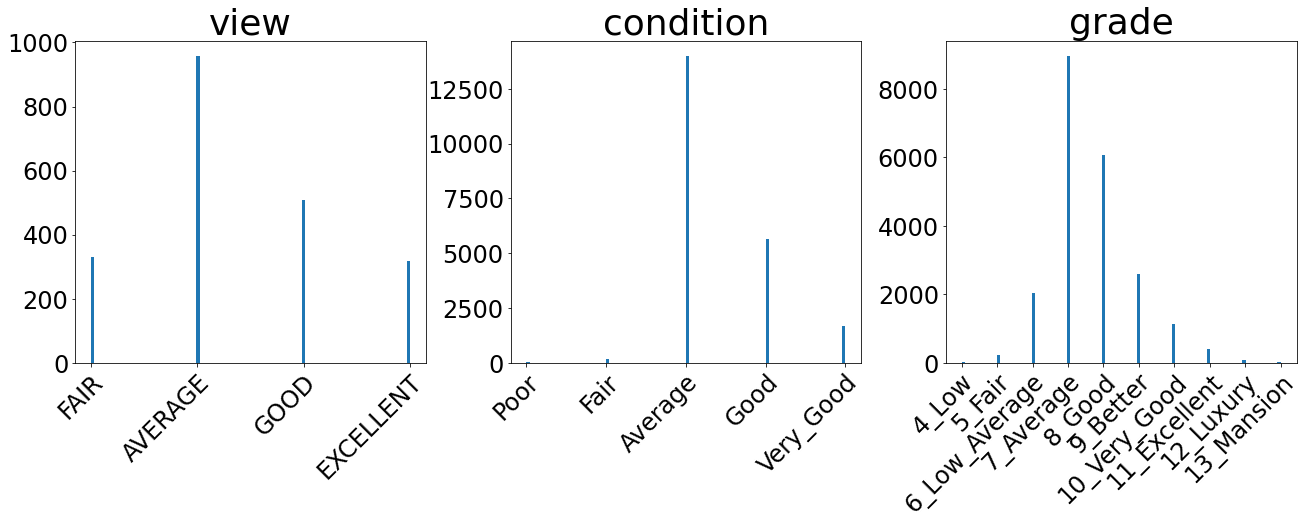

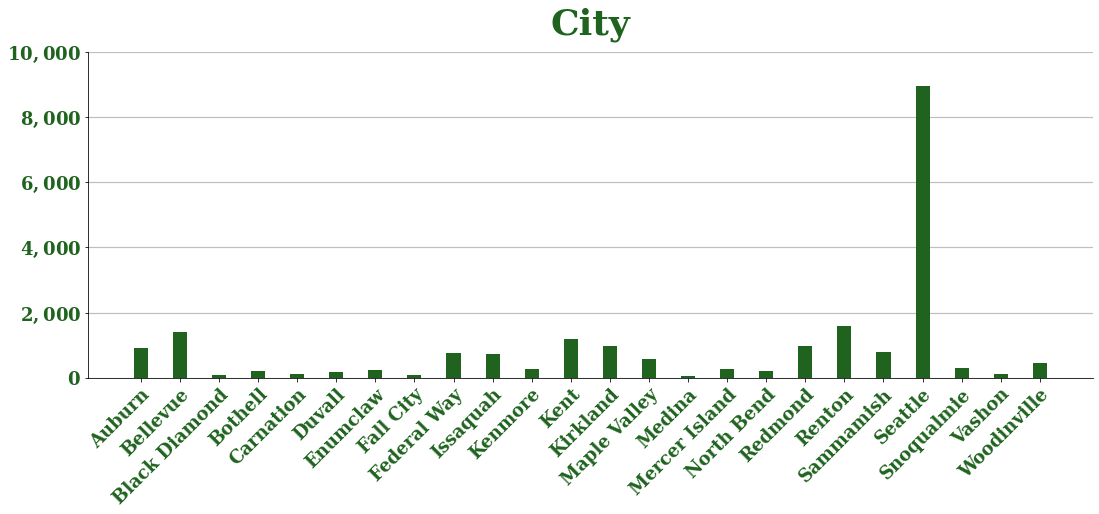

waterfront  basement  renovated  waterfront_Missing  yr_renovated_Missing  \
0       21388     12797      20790               19163                 17703   
1         145      8736        743                2370                  3830   

   sqft_basement_Missing  
0                  21081  
1                    452

In [40]:
# Creating updated and more organized distribution visualizations for the categorical features,
# as well as a separate visualziation for the `City` feature, 
# as I intended it to be used in my presentation and feature prominently on GitHub

cats = len(kc_cats.columns)
n_rows = int(cats / 2)

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), )
fig2, city_ax = plt.subplots(figsize=(18, 6))
axs = axs.flatten()

only_2_vals_df = pd.DataFrame()
empty_i = 0
city_i = 0
for c_i, cat in enumerate(kc_cats.columns):
    
    ax_i = c_i if empty_i==0 else c_i - empty_i if city_i==0 else c_i - empty_i - city_i
    
    if kc_cats[cat].nunique() > 2:
        plot_col = kc_cats[cat].copy()
        
        if cat != 'city': 
            cat_dict = all_dicts[cat].copy()

            if cat == 'view': 
                plot_col = plot_col.where(plot_col != 'NONE').dropna()
                del cat_dict['NONE']

            col_order = sorted(cat_dict.keys(), key=lambda k: cat_dict[k])
            plot_col = \
            plot_col.sort_values(key=lambda c_col: c_col.map(lambda x: col_order.index(x)))
            axs[ax_i].hist(plot_col, bins=100)
            
            axs[ax_i].tick_params('both', labelsize=15)
            plt.setp(axs[ax_i].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top')
            
            axs[ax_i].set_title(cat, size=36)
            
        else:
            
            # For this visualization the details were obviously more important
            
            city_i += 1
            c_step = 2000
            
            plot_col = plot_col.sort_values().map(lambda x: ' '.join(x.split('_')) if '_' in x else x)
            
            plot_col = plot_col.value_counts().sort_index()
            
            city_ax.bar(x=plot_col.index, height=plot_col.values, width=.36, color=get_lighter_color((.12, .39, .12), .09),
                        zorder=9)
            
            city_ax.grid(True, axis='y', lw=1.2, alpha=.81)
            [city_ax.spines[side].set_visible(False) for side in ['top', 'right']]
            city_ax.tick_params('both', labelsize=18, labelcolor=(.12, .39, .12))
            c_ticks = np.arange(0, plot_col.max() + c_step, c_step)
            def c_y_ticks(y, pos):
                return '$\mathbf{' + '{:,}'.format(y) + '}$'
            city_ax.set_yticks(c_ticks)
            city_ax.yaxis.set_major_formatter(c_y_ticks)
            plt.setp(city_ax.get_yticklabels(), weight='bold')
            plt.setp(city_ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top', family='serif',
                     weight='bold')
            
            city_ax.set_title(cat.title(), size=36, pad=18, weight='bold', family='serif', color=(.12, .39, .12))
        
        if cat=='yr_built': axs[ax_i].tick_params('both', labelsize=21)
            
    else: 
        empty_i += 1
        only_2_vals_df = pd.concat([only_2_vals_df, kc_cats[cat].value_counts()], axis=1)
    
fig.tight_layout(h_pad=1.5, w_pad=3)
fig.set_facecolor('w')
fig2.set_facecolor('w')

[ax.set_visible(False) for ax in axs if not ax.has_data()]
[ax.tick_params('both', labelsize=24) for ax in [fig.axes[0]] + fig.axes[1:5] + fig.axes[6:7]]

fig.savefig('visuals/categorical_features_distributions_2.png' , bbox_inches='tight')
fig2.savefig('visuals/city_distribution.png', bbox_inches='tight')

plt.show()

display(only_2_vals_df)

<a id='sect_corr'></a>

<h2 align='center'><strong>Initial Correlation Examination</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;The basic point of building a regression model is to find what impact an increase in one predictor, or ***independent*** variable, has on the target, or ***dependent*** variable, holding everything else constant.
&ensp;Eliminating predictors that are already highly correlated with each other attempts to achieve that goal as closely as possible.
&ensp;The predictors that are eliminated in this section could not be considered independent and would lead to unreliable statistical measurements.

In [41]:
# Creating a test df to explore correlations

kc_corr_test = pd.concat([kc_target, kc_nums, kc_cats], join='inner', axis=1)

kc_corr_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21252 entries, 2495 to 15937
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21252 non-null  float64
 1   sqft_living            21252 non-null  int64  
 2   sqft_lot               21252 non-null  int64  
 3   sqft_above             21252 non-null  int64  
 4   sqft_living15          21252 non-null  int64  
 5   sqft_lot15             21252 non-null  int64  
 6   yr_built               21252 non-null  int64  
 7   floors                 21252 non-null  float64
 8   bedrooms               21252 non-null  int64  
 9   bathrooms              21252 non-null  float64
 10  waterfront             21252 non-null  int64  
 11  view                   21252 non-null  object 
 12  condition              21252 non-null  object 
 13  grade                  21252 non-null  object 
 14  city                   21252 non-null  object 
 15 

In [42]:
# Replacing all categorical values with numeric values, as if I had encoded them

restruc_cols = list(kc_corr_test.columns[11:15])

for col in restruc_cols:
    if col!='city':        
        col_dict = all_dicts[col]
        kc_corr_test[col] = kc_corr_test[col].map(lambda x: col_dict[x])
    else:
        col_dict = {}
        for c_i, city in enumerate(kc_corr_test[col].unique()): col_dict[city] = c_i
        kc_corr_test[col] = kc_corr_test[col].map(lambda x: col_dict[x])

In [43]:
# I created a simple output to find the feature most correlated with the target,
# as well as a dataframe with any features that were highly correlated with each other

corr_df = kc_corr_test.corr()

# Varaibles' Correlations with the Target
#################################################################################################
price_corr = corr_df[['price']].copy()

price_corr.sort_values('price', ascending=False, inplace=True)

most_correlated_feature = price_corr.index[1]
most_correlated_value = price_corr.iloc[1][0]

print('\033[31m\033[4m\033[1mFeature Most Correlated with Price\033[0m:\t'+ most_correlated_feature)
print("\033[31m\033[4m\033[1mMost Correlated Feature's Value\033[0m:\t\t", round(most_correlated_value, 4))

# Varaibles' Correlation with Each Other
#################################################################################################
corr_df = corr_df.abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(['level_0', 'level_1'], axis=1, inplace=True)
corr_df.columns = ['correlation']

corr_df = corr_df[(corr_df.correlation > .8) & (corr_df.correlation < 1)]

display(corr_df)

Feature Most Correlated with Price:	sqft_living
Most Correlated Feature's Value:		 0.681


correlation
pairs                                 
(sqft_living, sqft_above)     0.865301
(sqft_above, sqft_living)     0.865301

<h3 align='center'><strong>Removing Highly Correlated Predictors</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;Based on my initial correlation examination, I decided to drop the `sqft_above` column from the `kc_nums` dataframe.

In [44]:
# Dropping `sqft_above` column from the numerical dataframe as it was too correlated with the more important `sqft_living`

kc_nums.drop('sqft_above', axis=1, inplace=True)

<a id='sect_dummies'></a>

<h2 align='center'><strong>Dummy Variable Creation</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;I used the `OneHotEncoder()` on the appropriate columns to create a properly encoded version of `kc_cats`.
&ensp;I also created a dictionary with the original categorical columns as the keys and the dummy columns that were created from each of them as the values for each key.
&ensp;Finally, I rearranged the columns of `kc_cats` in a way that I found more logical.

In [45]:
# Getting the order of columns to regroup them into appropriate lists

orig_cat_cols = list(kc_cats.columns)
[print(c_i, col) for c_i, col in enumerate(orig_cat_cols)];

0 waterfront
1 view
2 condition
3 grade
4 city
5 basement
6 renovated
7 waterfront_Missing
8 yr_renovated_Missing
9 sqft_basement_Missing


In [46]:
# Grouping the columns

missing_cols = orig_cat_cols[-3:]
orig_cat_cols = orig_cat_cols[:-3]

missing_cols

['waterfront_Missing', 'yr_renovated_Missing', 'sqft_basement_Missing']

In [47]:
# Checking the order of the columns in the already prepared lists

num_cols = list(kc_nums.columns)

print(num_cols, '\n')
print(orig_cat_cols)

['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built', 'floors', 'bedrooms', 'bathrooms'] 

['waterfront', 'view', 'condition', 'grade', 'city', 'basement', 'renovated']


In [48]:
# Reorgnazing the columns into a way I found more logical and making sure I didn't miss any

new_cat_order = ['basement', 'grade', 'view', 'waterfront', 'condition', 'renovated', 'city']

assert len(new_cat_order)==len(orig_cat_cols)

In [49]:
# Encdoding each of the categorical features that still required encoding and creating dictionaries with the
# original columns as the keys and their encoded columns as the values

kc_coded_cats = pd.DataFrame()
cat_dummy_dict = {}
for n_cat in num_cols:
    cat_dummy_dict[n_cat] = n_cat

for c_i, cat in enumerate(new_cat_order):
    if kc_cats[cat].nunique() <= 2: 
        cat_df = kc_cats[cat]
        cat_dummy_dict[cat] = cat
    else:
        cat_col = kc_cats[[cat]].applymap(lambda x: cat +'_'+ x)
        
        if cat!='city':
            cat_order = [cat +'_'+ sub_cat for sub_cat in list(all_dicts[cat].keys())]
            
            ohe_encoder = OneHotEncoder(categories=[cat_order], drop='first', sparse=False)
            ohe_encoder.fit(cat_col)
            coded_cat = ohe_encoder.transform(cat_col)
            
            cat_df = pd.DataFrame(coded_cat, columns=list(ohe_encoder.categories_[0])[1:], index=kc_cats.index)
        
            cat_dummy_dict[cat] = list(ohe_encoder.categories_[0])[1:]

        if cat=='city':
            ohe_encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)
            ohe_encoder.fit(cat_col)
            coded_cat = ohe_encoder.transform(cat_col)

        cat_df = pd.DataFrame(coded_cat, columns=list(ohe_encoder.categories_[0])[1:], index=kc_cats.index)
        
        cat_dummy_dict[cat] = list(ohe_encoder.categories_[0])[1:]
        
    kc_coded_cats = pd.concat([kc_coded_cats, cat_df], axis=1)

In [50]:
# Finalizing my `cat_dummy_dict` with the encoded missing cols

cat_dummy_dict['_Missing'] = missing_cols

In [51]:
# Uncomment the line below to see the `cat_dummy_dict`

# [print(cat, '\n', dum_cols, '\n') for cat, dum_cols in cat_dummy_dict.items()];

<a id='sect_preproc'></a>

<h2 align='center'><strong>Preprocessed DataFrames</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;The last visualization that I created shows that there were significantly more entries within the city of Seattle compared to the rest of the cities.
&ensp;To explore the difference between the sales of residential properties inside Seattle vs. outside Seattle, which predictors were important for each, as well as the difference between the coefficients of the important predictors shared by both, I created a separate preprocessed dataframe for each.
&ensp;Of course, I also created a preprocessed dataframe for all of King County.
&ensp;Beyond the intrinsic value of building a model for the entire county, it also had the added benefit of serving as a useful comparison to the results of the separated dataframes.

In [52]:
# Splitting the data into properties inside of Seattle and properties Outside of Seattle 
# and checking how many were in each

seattle_entries = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 1].shape[0]
out_seattle_entries = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 0].shape[0]

print(bold_red +'Number of Entries Inside Seattle'+ every_off +':\t'+ str(seattle_entries))
print(bold_red +'Number of Entries Outside Seattle'+ every_off +':\t'+ str(out_seattle_entries))

Number of Entries Inside Seattle:	8946
Number of Entries Outside Seattle:	12587


<h3 align='center'><strong>All King County Preprocessed DataFrame</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;In the following cells, I combined the target variable, the numerical features, and the categorical features into the preprocessed dataframe for all of King County.
&ensp;I then removed the dummy columns created from the `city` column.  I did this because I created entirely separate models based on the `city` feature and keeping them would only add additional noise at this point.
&ensp;I then split the preprocessed dataframes into their `x` and `y` components.
&ensp;I performed one final check to make sure there were no categorical variables present with low frequencies, and that the `X` and `y` components of the dataframe had the same `x-component` in their `shape`’s, i.e. they were they same length.

In [53]:
# Combining the target, the numerical df, and the categorical df

kc_preproc = pd.concat([kc_target, kc_nums, kc_coded_cats], join='inner', axis=1)

In [54]:
# Removing the `city_` columns

kc_preproc = kc_preproc.loc[:, list(kc_preproc.columns.map(lambda x: 'city' not in x))]

In [55]:
# Making sure they were removed

not any(kc_preproc.columns.map(lambda x: 'city' in x))

True

In [56]:
# Splitting the df into its `X` and `y` components

kc_X = kc_preproc.drop('price', axis=1)
kc_y = kc_preproc['price']

In [57]:
# Creating dataframes of the sums of the binary encoded columns

kc_X_sums = kc_X[[col for col in kc_preproc.columns if col in kc_coded_cats.columns]].sum()
kc_X_sums = pd.DataFrame(kc_X_sums.values, index=kc_X_sums.index)

In [58]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

kc_less_10_entries = kc_X_sums.loc[kc_X_sums[0] < 10].sort_values(0)

kc_X.drop(list(kc_less_10_entries.index), axis=1, inplace=True)

In [59]:
# Making sure the X and y components were the same shape

assert kc_X.shape[0]==kc_y.shape[0]

<h3 align='center'><strong>Seattle Preprocessed DataFrame</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;For the Seattle Preprocessed DataFrame, I performed the same steps as I described in the All King County Preprocessed DataFrame, but first I separated out only the Seattle properties from `kc_coded_cats`.

In [60]:
# Creating the inside Seattle version of the categorical dataframe

kc_coded_cats_seattle = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 1].copy()

In [61]:
# Removing the `city_` columns from the inside Seattle version of the categorical dataframe

kc_coded_cats_seattle = \
kc_coded_cats_seattle.loc[:, list(kc_coded_cats_seattle.columns.map(lambda x: 'city' not in x))]

In [62]:
# Making sure they were removed

not any(kc_coded_cats_seattle.columns.map(lambda x: 'city' in x))

True

In [63]:
# Combining the target, the numerical df, and the Seattle categorical df

kc_preproc_seattle = pd.concat([kc_target, kc_nums, kc_coded_cats_seattle], join='inner', axis=1)

In [64]:
# Splitting the df into its `X` and `y` components

kc_X_seattle = kc_preproc_seattle.drop('price', axis=1)
kc_y_seattle = kc_preproc_seattle['price']

In [65]:
# Creating dataframes of the sums of the binary encoded columns

seattle_X_sums = kc_X_seattle[kc_coded_cats_seattle.columns].sum()
seattle_X_sums = pd.DataFrame(seattle_X_sums.values, index=seattle_X_sums.index)

In [66]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

seattle_less_10_entries = seattle_X_sums.loc[seattle_X_sums[0] < 10].sort_values(0)

kc_X_seattle.drop(list(seattle_less_10_entries.index), axis=1, inplace=True)

In [67]:
# Making sure the X and y components were the same shape

assert kc_X_seattle.shape[0]==kc_y_seattle.shape[0]

<h3 align='center'><strong>Outside Seattle Preprocessed DataFrame</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;I separated the properties that were outside of Seattle from `kc_coded_cats`, and then performed the exact same steps as in the previous two sections to create the Outside Seattle Preprocessed DataFrame.

In [68]:
# Creating the outside Seattle version of the categorical dataframe

kc_coded_cats_out_seattle = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 0].copy()

In [69]:
# Removing the `city_` columns from the outside Seattle version of the categorical dataframe

kc_coded_cats_out_seattle = \
kc_coded_cats_out_seattle.loc[:, list(kc_coded_cats_out_seattle.columns.map(lambda x: 'city' not in x))]

In [70]:
# Making sure they were removed

not any(kc_coded_cats_seattle.columns.map(lambda x: 'city' in x))

True

In [71]:
# Combining the target, the numerical df, and the outside Seattle categorical df

kc_preproc_out_seattle = \
pd.concat([kc_target, kc_nums, kc_coded_cats_out_seattle], join='inner', axis=1)

In [72]:
# Splitting the df into its `X` and `y` components

kc_X_out_seattle = kc_preproc_out_seattle.drop('price', axis=1)
kc_y_out_seattle = kc_preproc_out_seattle['price']

In [73]:
# Creating dataframes of the sums of the binary encoded columns

out_seattle_X_sums = kc_X_out_seattle[kc_coded_cats_out_seattle.columns].sum()
out_seattle_X_sums = pd.DataFrame(out_seattle_X_sums.values, index=out_seattle_X_sums.index)

In [74]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

out_seattle_less_10_entries = out_seattle_X_sums.loc[out_seattle_X_sums[0] < 10].sort_values(0)

kc_X_out_seattle.drop(list(out_seattle_less_10_entries.index), axis=1, inplace=True)

In [75]:
# Making sure the X and y components were the same shape

assert kc_X_out_seattle.shape[0]==kc_y_out_seattle.shape[0]

<a id='sect_model_iter'></a>

<h1 align='center'><strong>Model Iterations</strong></h1>

<a id='sect_base_models'></a>

<h2 align='center'><strong>Base Models</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;With the preprocessed dataframes ready, I could begin building models.
&ensp;The base models for each preprocessed dataframe are just the relationship between the most correlated feature, `sqft_living`, and the target variable, `price`, which will be used to judge the performance of future models.

In [76]:
# All King County Base Model

kc_base_const = sm.add_constant(kc_X[most_correlated_feature])
kc_base_model = sm.OLS(endog=kc_y, exog=kc_base_const).fit()

In [77]:
# Seattle Base Model

base_const_seattle = sm.add_constant(kc_X_seattle[most_correlated_feature])
seattle_base_model = sm.OLS(endog=kc_y_seattle, exog=base_const_seattle).fit()

In [78]:
# Outside Seattle Base Model

base_const_out_seattle = sm.add_constant(kc_X_out_seattle[most_correlated_feature])
out_seattle_base_model = sm.OLS(endog=kc_y_out_seattle, exog=base_const_out_seattle).fit()

<a id='sect_full'></a>

<h2 align='center'><strong>Full Models</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;After getting a baseline for each preprocessed dataframe, I created models for each with all the predictors available.
&ensp;I then began eliminating them to create a final model with only the best predictors.
&ensp;First, I removed predictors based on their `Variance Inflation Factor (VIF)` scores to eliminate predictors with high levels of multicollinearity missed by my initial correlation examination.
&ensp;I then used the `RFECV` feature selection method to eliminate all but the best predictors.
&ensp;Finally, I eliminated all predictors with `pvalues` less than the standard confidence level of `0.05`, to only include the predictors of the highest statistical significance.

&nbsp;&nbsp;&nbsp;&nbsp;Once the predictors for each model were finalized, I could investigate the `Linearity, Normality, and Homoscedasticity` of the predicted values generated by each model.
&ensp;For each of the models, a log transformation of the target variable was necessary for the model to meet the assumptions required when building multiple linear regression models.
&ensp;I then had a final equation that I could analyze to produce my [Insights and Conclusions](#sect_insights_and_conclusions).
&ensp;I transformed the coefficients in the equation to make understanding them easier.

&nbsp;&nbsp;&nbsp;&nbsp;I also created simple dataframes with the coefficients, the $r^2$, and the adjusted $r^2$ scores from each model to make any comparisons between the models easier.

&nbsp;&nbsp;&nbsp;&nbsp;After I had created the comparison dataframes for each of the models, I could [analyze the performance of the models](#sect_model_end).

<a id='sub_sect_kc'></a>

<h3 align='center'><strong>All King County Full Model</strong></h3>

In [79]:
# Created an appropriate copy of the X component to make sure I could still access the original without changes
# if necessary

kc_X_full = kc_X.copy()

In [80]:
# All King County First Full Model

kc_full_const = sm.add_constant(kc_X_full)
kc_full_model = sm.OLS(endog=kc_y, exog=kc_full_const).fit()

<h4><strong><code>kc_VIF</code></strong></h4>

In [81]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_full)
    kc_full_VIF_model = sm.OLS(endog=kc_y, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    kc_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(kc_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = kc_VIF.loc[kc_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_full.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_full.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

Mid VIF Dropped Columns 
 ['sqft_living'] 

VIF Elimination Finished


<h4><strong><code>kc_RFECV</code></strong></h4>

In [82]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_full)
    kc_full_RFECV_model = sm.OLS(endog=kc_y, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    kc_X_for_RFECV = StandardScaler().fit_transform(kc_X_full)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(kc_X_for_RFECV, kc_y)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_full.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = kc_full_RFECV_model.pvalues[r_col], kc_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_full.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Dropped Columns 
 ['bedrooms'] 

RFECV Finished


<h4><strong><code>kc_pvals</code></strong></h4>

In [83]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    
    kc_pval_const = sm.add_constant(kc_X_full)
    kc_pval_model = sm.OLS(endog=kc_y, exog=kc_pval_const).fit()
    
    high_pval_list = list(kc_pval_model.pvalues.loc[kc_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_full.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

1 - High p-value Column Dropped:
 sqft_lot 

2 - High p-value Column Dropped:
 condition_Fair 

High p_value Elimination Finsihed


<h4 align='center'><strong><code>kc_fin_model</code></strong></h4>

In [84]:
# Simply renaming the last version of the model that was created as the final model

kc_fin_const = kc_pval_const
kc_fin_model = kc_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality, and Homoscedasticity of <code>kc_fin_model</code></strong></h5>

In [85]:
# Changing the `rcParams` to make my visualizaitons look better

plt.rc('figure', figsize=(18, 18), facecolor='w')
plt.rc('axes', titlesize=24, titlepad=18, titleweight='bold', labelsize=21, labelpad=9)
plt.rc('xtick', labelsize=18)
plt.rc('xtick.major', size=9)
plt.rc('ytick', labelsize=18)
plt.rc('ytick.major', size=9)
plt.rc('legend', fontsize=18)

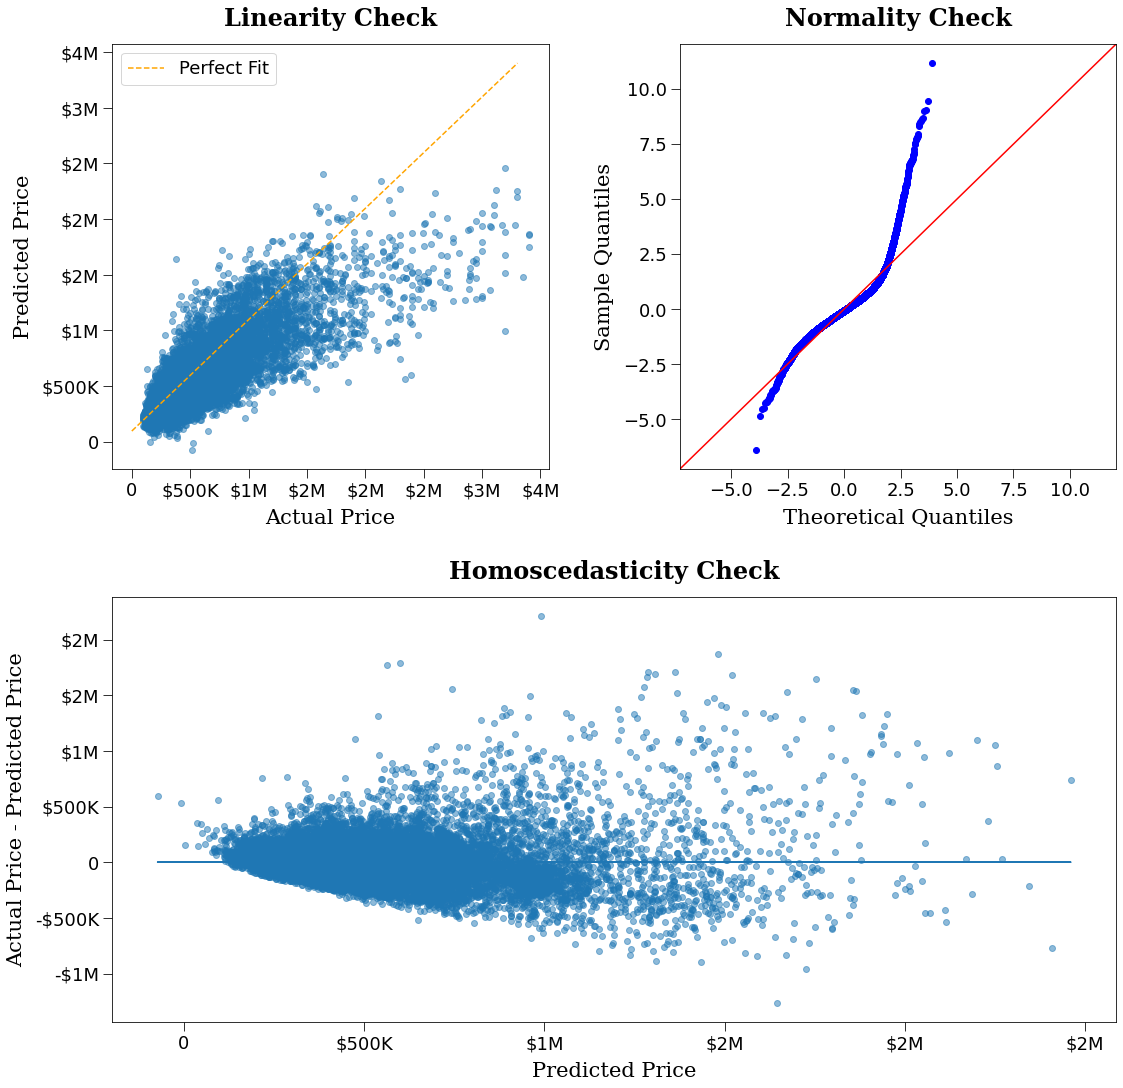

In [86]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

kc_preds = kc_fin_model.predict(kc_fin_const)
perfect_line = np.arange(kc_y.min(), kc_y.max())
kc_resids = (kc_y - kc_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y, kc_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(kc_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(kc_preds, kc_resids, alpha=0.5)
homo_ax.plot(kc_preds, [0 for i in range(len(kc_X_full))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
    
fig.savefig('visuals/kc_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>kc_log_model</code></strong></h4>

In [87]:
# Only log transforming the target (y component)

kc_log_y = np.log(kc_y)

In [88]:
# Creating the log model

kc_log_const = sm.add_constant(kc_X_full)
kc_log_model = sm.OLS(endog=kc_log_y, exog=kc_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>kc_log_model</code></strong></h5>

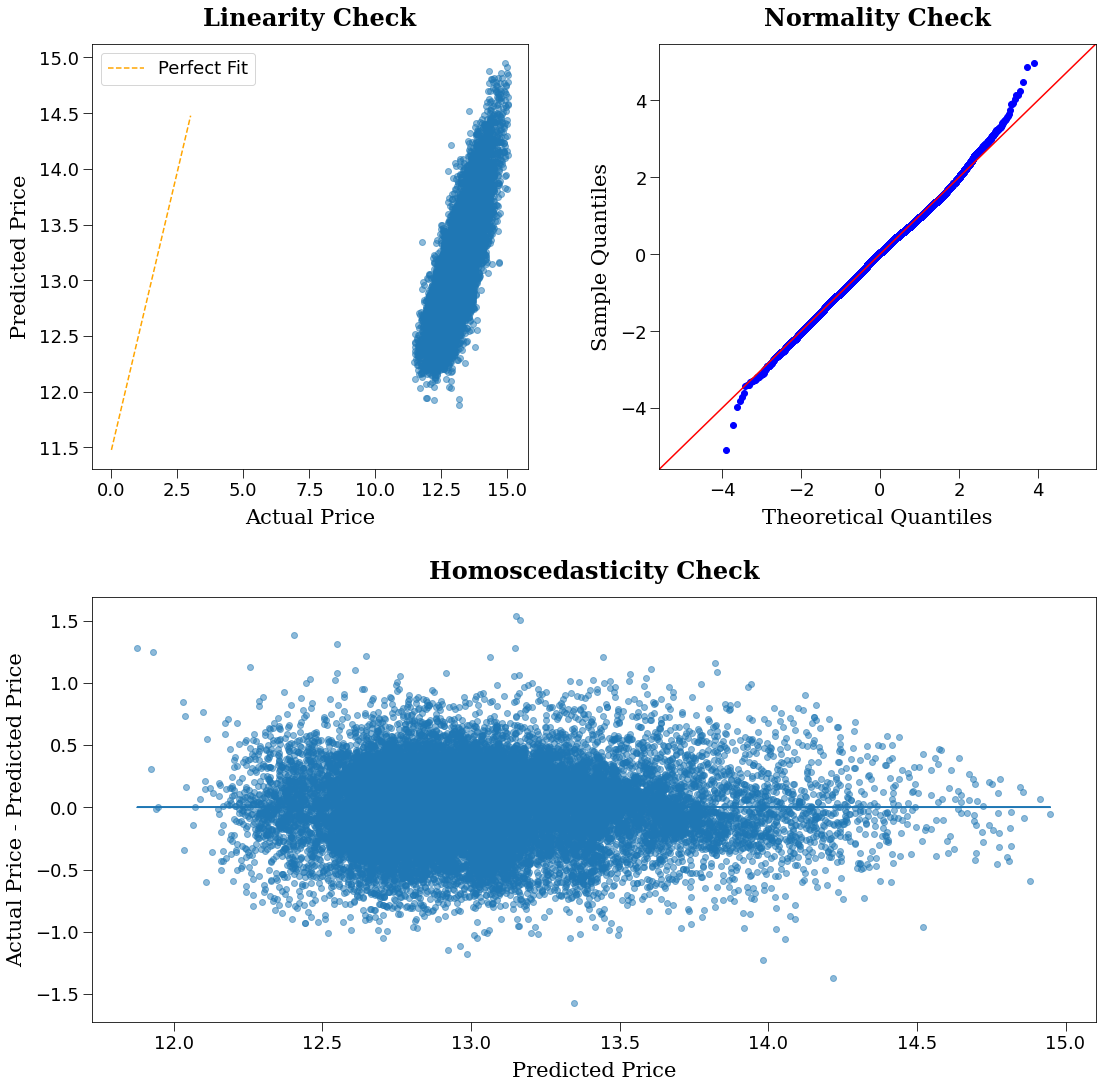

In [89]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

kc_preds = kc_log_model.predict(kc_log_const)
perfect_line = np.arange(kc_log_y.min(), kc_log_y.max())
kc_resids = (kc_log_y - kc_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_log_y, kc_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(kc_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(kc_preds, kc_resids, alpha=0.5)
homo_ax.plot(kc_preds, [0 for i in range(len(kc_X_full))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

fig.savefig('visuals/kc_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>kc</code> Models</strong></h4>

In [90]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

kc_model_list = [kc_base_model, kc_full_model, kc_full_VIF_model, kc_full_RFECV_model, kc_fin_model, kc_log_model]
kc_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [91]:
# Creating the comparison dataframe

kc_r_vals = {}
kc_r_adj_vals = {}
kc_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(kc_model_list, kc_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    kc_r_vals[model_name] = ols_model.rsquared
    kc_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    kc_compare_params_df = pd.concat([kc_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([kc_r_vals, kc_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    kc_compare_params_df = pd.concat([kc_compare_params_df, r_ser])    

In [92]:
# Rounding columns for readability and displaying the comparision dataframe

for col in kc_compare_params_df.columns[:-1]:
    kc_compare_params_df[col] = kc_compare_params_df[col].round(2)
    
display(kc_compare_params_df)

base        full    full_VIF  full_RFECV         fin  \
const               -7280.35  7809097.15  6459853.30  6462129.76  6452238.52   
sqft_living           261.48      104.38         NaN         NaN         NaN   
sqft_lot                 NaN       -0.04        0.12        0.12         NaN   
sqft_living15            NaN       41.64       83.11       83.17       83.10   
sqft_lot15               NaN       -0.53       -0.47       -0.47       -0.34   
yr_built                 NaN    -3119.87    -3282.15    -3283.12    -3278.32   
floors                   NaN    46100.94    52375.89    52361.00    52306.58   
bedrooms                 NaN   -22952.97      223.29         NaN         NaN   
bathrooms                NaN    42868.74    77159.19    77298.16    77442.02   
basement                 NaN    32116.56    51551.28    51563.71    51438.78   
grade_4_Low              NaN -1824063.90  -187579.91  -187743.02  -188944.09   
grade_5_Fair             NaN -1787233.31  -143073.61  -143151.32  -144370.53   
grade_6_Low_Average      NaN -1737784.11   -83915.84   -83961.50   -84404.00   
grade_7_Average          NaN -1660109.06         NaN         NaN         NaN   
grade_8_Good             NaN -1573763.42    98147.15    98126.93    98318.31   
grade_9_Better           NaN -1429411.76   273782.53   273764.58   274124.15   
grade_10_Very_Good       NaN -1245858.14   489751.73   489693.57   490184.03   
grade_11_Excellent       NaN  -980757.75   792073.15   791987.22   792977.61   
grade_12_Luxury          NaN  -739148.73  1063619.16  1063480.74  1063294.31   
view_FAIR                NaN   113813.67   118504.75   118465.59   118521.95   
view_AVERAGE             NaN    52879.48    58193.31    58160.51    58505.27   
view_GOOD                NaN   111983.58   116426.71   116375.00   116771.65   
view_EXCELLENT           NaN   273371.04   280048.57   280001.49   280260.71   
waterfront               NaN   399051.42   412021.06   411947.14   411161.50   
condition_Fair           NaN    16415.06   -30040.60   -30040.28         NaN   
condition_Average        NaN    43758.80         NaN         NaN         NaN   
condition_Good           NaN    62258.58    21005.91    21025.69    21585.83   
condition_Very_Good      NaN   106606.33    66423.27    66438.16    66985.35   
renovated                NaN    39798.91    47573.29    47542.60    47989.47   
r_score                 0.46        0.67        0.65        0.65        0.65   
r_adj_score             0.46        0.67        0.65        0.65        0.65   

                              log  
const                2.361341e+01  
sqft_living                   NaN  
sqft_lot                      NaN  
sqft_living15        1.631734e-04  
sqft_lot15          -4.216644e-08  
yr_built            -5.848024e-03  
floors               1.218029e-01  
bedrooms                      NaN  
bathrooms            1.115987e-01  
basement             1.078571e-01  
grade_4_Low         -6.916794e-01  
grade_5_Fair        -4.577739e-01  
grade_6_Low_Average -2.608300e-01  
grade_7_Average               NaN  
grade_8_Good         2.269634e-01  
grade_9_Better       4.815873e-01  
grade_10_Very_Good   6.703627e-01  
grade_11_Excellent   8.438279e-01  
grade_12_Luxury      9.580409e-01  
view_FAIR            1.518748e-01  
view_AVERAGE         7.835841e-02  
view_GOOD            1.039889e-01  
view_EXCELLENT       2.473811e-01  
waterfront           3.217959e-01  
condition_Fair                NaN  
condition_Average             NaN  
condition_Good       2.507780e-02  
condition_Very_Good  9.616968e-02  
renovated            3.178284e-02  
r_score              6.386262e-01  
r_adj_score          6.382517e-01

<h4 align='center'><strong>Final <code>kc</code> Equation</strong></h4>

In [93]:
# Taking the pieces of the final equation and making them more readable

kc_log_int = int(np.exp(kc_compare_params_df.log.dropna()[0]))
kc_log_percs = kc_compare_params_df.log.dropna()[1:-2] * 100

In [94]:
# Continuing the process of making the pieces of the equation more readable

kc_fin_percs = list(kc_log_percs.values.astype(int))
kc_fin_preds = list(kc_log_percs.index)

In [95]:
# Creating strings of the pieces of the equation with their column names

kc_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(kc_fin_percs, kc_fin_preds)]

In [96]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(kc_log_int) +' +\n'
model_var_string = ' +\n'.join(kc_perc_eq)

In [97]:
# Putting the final equation together and printing it

kc_log_eq = model_eq + model_int_string + model_var_string

print(kc_log_eq)

price = 17995986068 +
0% * sqft_living15 +
0% * sqft_lot15 +
0% * yr_built +
12% * floors +
11% * bathrooms +
10% * basement +
-69% * grade_4_Low +
-45% * grade_5_Fair +
-26% * grade_6_Low_Average +
22% * grade_8_Good +
48% * grade_9_Better +
67% * grade_10_Very_Good +
84% * grade_11_Excellent +
95% * grade_12_Luxury +
15% * view_FAIR +
7% * view_AVERAGE +
10% * view_GOOD +
24% * view_EXCELLENT +
32% * waterfront +
2% * condition_Good +
9% * condition_Very_Good +
3% * renovated


<a id='sub_sect_seattle'></a>

<h3 align='center'><strong>Seattle Full Model</strong></h3>

In [98]:
# Inside Seattle First Full Model

seattle_full_const = sm.add_constant(kc_X_seattle)
seattle_full_model = sm.OLS(endog=kc_y_seattle, exog=seattle_full_const).fit()

<h4><strong><code>seattle_VIF</code></strong></h4>

In [99]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_seattle)
    seattle_full_VIF_model = sm.OLS(endog=kc_y_seattle, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    seattle_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(seattle_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = seattle_VIF.loc[seattle_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_seattle.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_seattle.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

VIF Elimination Finished


<h4><strong><code>seattle_RFECV</code></strong></h4>

In [100]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_seattle)
    seattle_full_RFECV_model = sm.OLS(endog=kc_y_seattle, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    seattle_X_for_RFECV = StandardScaler().fit_transform(kc_X_seattle)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(seattle_X_for_RFECV, kc_y_seattle)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_seattle.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = seattle_full_RFECV_model.pvalues[r_col], seattle_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_seattle.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Dropped Columns 
 ['basement', 'view_AVERAGE', 'condition_Fair', 'renovated'] 

RFECV Dropped Columns 
 ['view_FAIR'] 

RFECV Finished


<h4><strong><code>seattle_pvals</code></strong></h4>

In [101]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    seattle_pval_const = sm.add_constant(kc_X_seattle)
    seattle_pval_model = sm.OLS(endog=kc_y_seattle, exog=seattle_pval_const).fit()
    
    high_pval_list = \
    list(seattle_pval_model.pvalues.loc[seattle_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_seattle.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

High p_value Elimination Finsihed


<h4 align='center'><strong><code>seattle_fin_model</code></strong></h4>

In [102]:
# Simply renaming the last version of the model that was created as the final model

seattle_fin_const = seattle_pval_const
seattle_fin_model = seattle_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>seattle_fin_model</code></strong></h5>

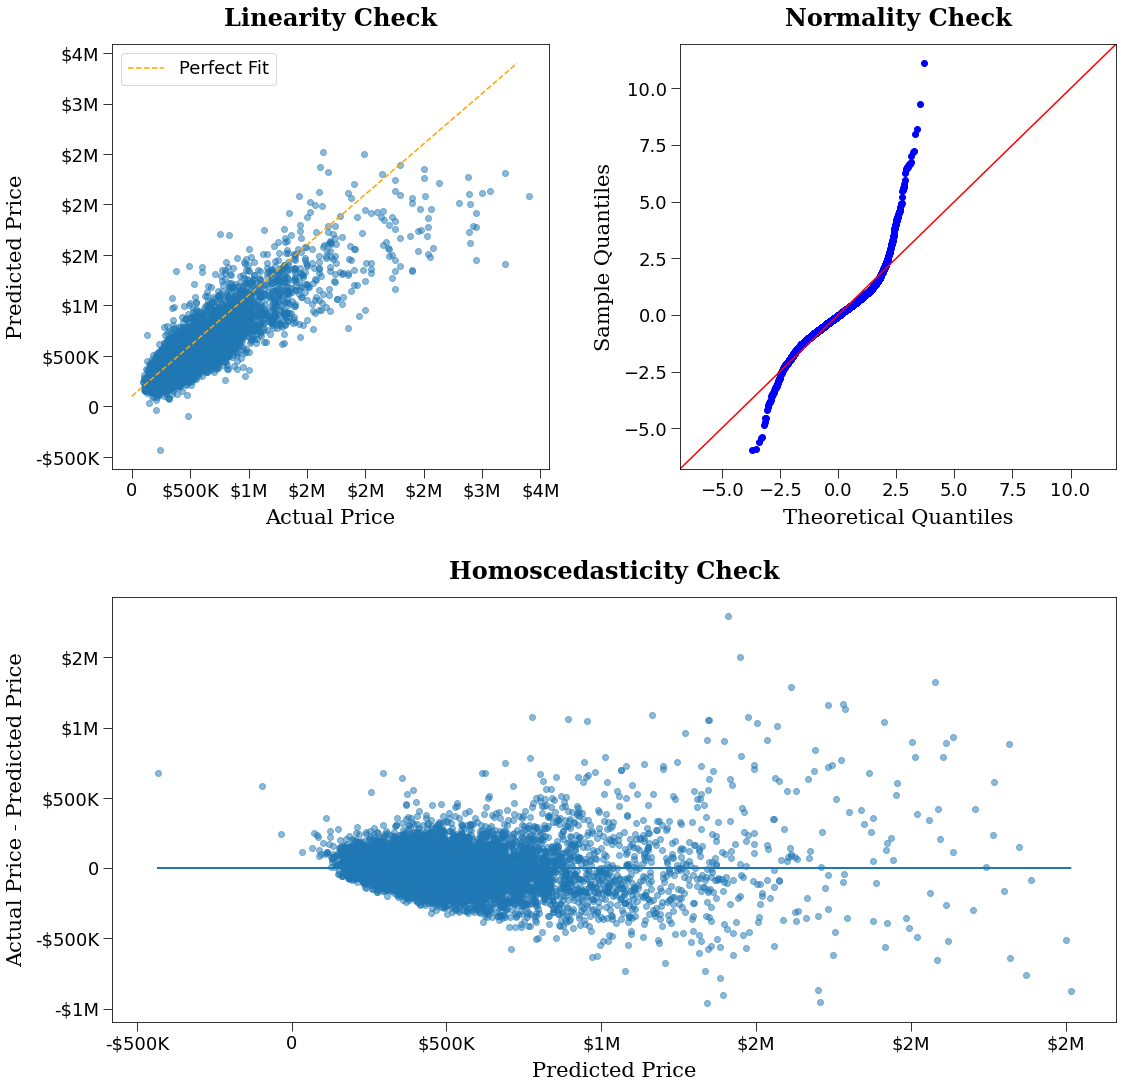

In [103]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

seattle_preds = seattle_fin_model.predict(seattle_fin_const)
perfect_line = np.arange(kc_y_seattle.min(), kc_y_seattle.max())
seattle_resids = (kc_y_seattle - seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y_seattle, seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(seattle_preds, seattle_resids, alpha=0.5)
homo_ax.plot(seattle_preds, [0 for i in range(len(kc_X_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
        
fig.savefig('visuals/seattle_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>seattle_log_model</code></strong></h4>

In [104]:
# Only log transforming the target (y component)

seattle_log_y = np.log(kc_y_seattle)

In [105]:
# Creating the log model

seattle_log_const = sm.add_constant(kc_X_seattle)
seattle_log_model = sm.OLS(endog=seattle_log_y, exog=seattle_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>seattle_log_model</code></strong></h5>

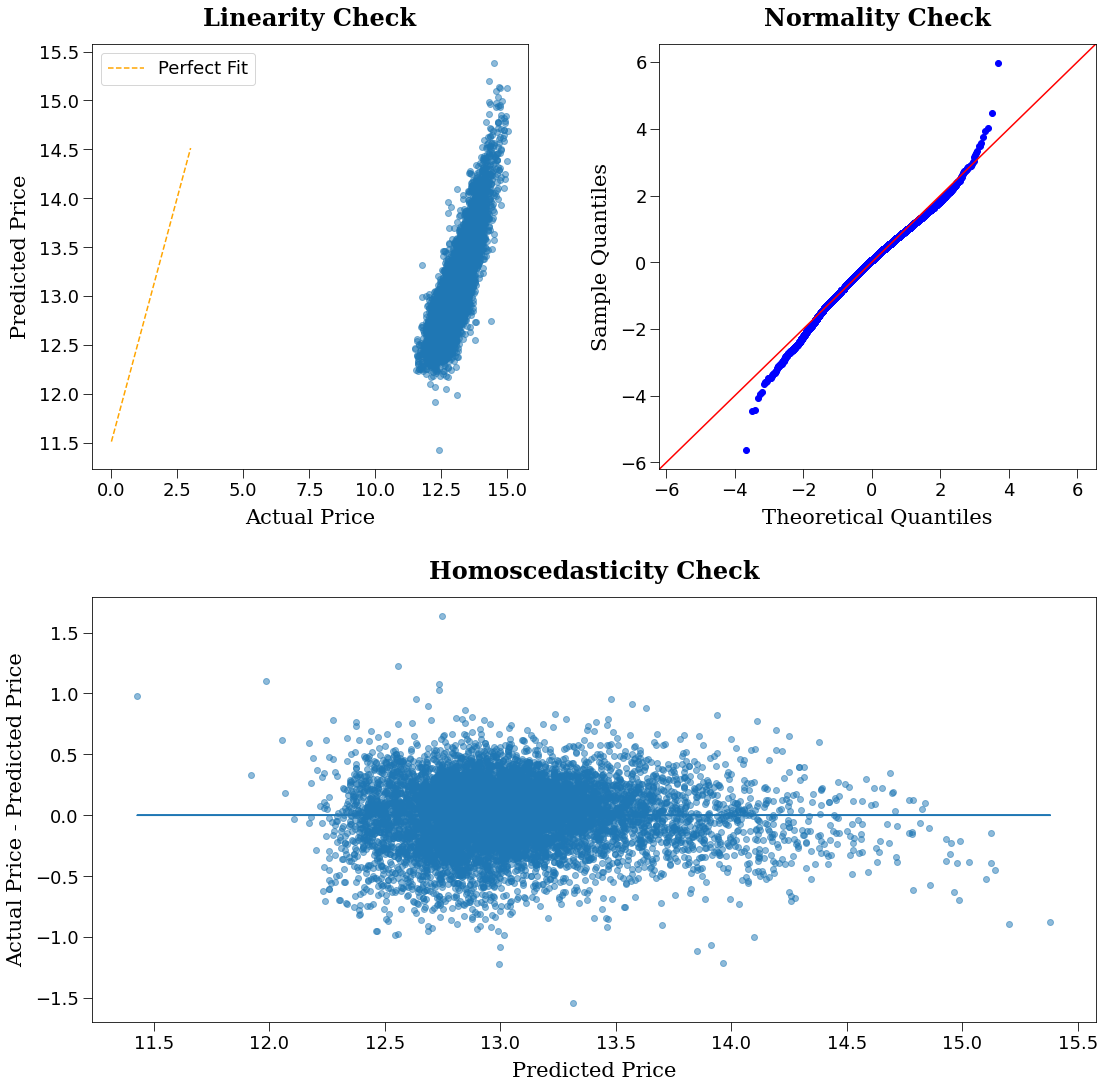

In [106]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

seattle_preds = seattle_log_model.predict(seattle_log_const)
perfect_line = np.arange(seattle_log_y.min(), seattle_log_y.max())
seattle_resids = (seattle_log_y - seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(seattle_log_y, seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(seattle_preds, seattle_resids, alpha=0.5)
homo_ax.plot(seattle_preds, [0 for i in range(len(kc_X_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')
    
fig.savefig('visuals/seattle_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>seattle</code> Models</strong></h4>

In [107]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

seattle_model_list = [seattle_base_model, seattle_full_model, seattle_full_VIF_model, seattle_full_RFECV_model, 
                      seattle_fin_model, seattle_log_model]

seattle_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [108]:
# Creating the comparison dataframe

seattle_r_vals = {}
seattle_r_adj_vals = {}
seattle_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(seattle_model_list, seattle_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    seattle_r_vals[model_name] = ols_model.rsquared
    seattle_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    seattle_compare_params_df = pd.concat([seattle_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([seattle_r_vals, seattle_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    seattle_compare_params_df = pd.concat([seattle_compare_params_df, r_ser])    

In [109]:
# Rounding columns for readability and displaying the comparision dataframe

for col in seattle_compare_params_df.columns[:-1]:
    seattle_compare_params_df[col] = seattle_compare_params_df[col].round(2)
    
display(seattle_compare_params_df)

base        full    full_VIF  full_RFECV         fin  \
const                7148.41  5333377.91  4955405.95  4931055.88  4931055.88   
sqft_living           293.17      132.05      133.24      132.20      132.20   
sqft_lot                 NaN       -2.42       -2.41       -2.38       -2.38   
sqft_living15            NaN      126.94      126.28      127.24      127.24   
sqft_lot15               NaN      -10.54      -10.58      -10.50      -10.50   
yr_built                 NaN    -2507.17    -2497.41    -2486.75    -2486.75   
floors                   NaN    35863.57    35559.84    36845.28    36845.28   
bedrooms                 NaN   -22514.14   -22831.38   -22741.82   -22741.82   
bathrooms                NaN    21280.67    21320.80    20498.57    20498.57   
basement                 NaN    -3824.76    -4171.91         NaN         NaN   
grade_5_Fair             NaN  -581360.13   -82229.67   -82993.26   -82993.26   
grade_6_Low_Average      NaN  -567664.35   -62209.15   -62114.42   -62114.42   
grade_7_Average          NaN  -506305.59         NaN         NaN         NaN   
grade_8_Good             NaN  -419868.92    85929.39    86018.73    86018.73   
grade_9_Better           NaN  -209811.48   295544.35   296120.03   296120.03   
grade_10_Very_Good       NaN    45007.42   550147.65   550587.36   550587.36   
grade_11_Excellent       NaN   431136.45   935934.09   936929.89   936929.89   
grade_12_Luxury          NaN   768524.41  1274943.87  1273545.31  1273545.31   
view_FAIR                NaN    14043.81    15984.20         NaN         NaN   
view_AVERAGE             NaN     1781.80     1832.89         NaN         NaN   
view_GOOD                NaN    41409.22    41314.30    39783.88    39783.88   
view_EXCELLENT           NaN   148073.89   146713.13   144797.97   144797.97   
waterfront               NaN   292109.29   290993.79   290293.97   290293.97   
condition_Fair           NaN   126590.76   -18423.97         NaN         NaN   
condition_Average        NaN   146533.86         NaN         NaN         NaN   
condition_Good           NaN   167227.76    21038.39    21818.15    21818.15   
condition_Very_Good      NaN   200539.67    54257.01    54980.71    54980.71   
renovated                NaN    -5065.08    -4002.50         NaN         NaN   
r_score                 0.49        0.75        0.75        0.75        0.75   
r_adj_score             0.49        0.75        0.75        0.75        0.75   

                           log  
const                21.109068  
sqft_living           0.000195  
sqft_lot             -0.000006  
sqft_living15         0.000175  
sqft_lot15           -0.000018  
yr_built             -0.004456  
floors                0.053535  
bedrooms             -0.034782  
bathrooms             0.051309  
basement                   NaN  
grade_5_Fair         -0.405146  
grade_6_Low_Average  -0.247196  
grade_7_Average            NaN  
grade_8_Good          0.203915  
grade_9_Better        0.461423  
grade_10_Very_Good    0.591960  
grade_11_Excellent    0.734934  
grade_12_Luxury       1.232234  
view_FAIR                  NaN  
view_AVERAGE               NaN  
view_GOOD             0.044170  
view_EXCELLENT        0.206857  
waterfront            0.392167  
condition_Fair             NaN  
condition_Average          NaN  
condition_Good        0.066183  
condition_Very_Good   0.097061  
renovated                  NaN  
r_score               0.695715  
r_adj_score           0.695024

<h4 align='center'><strong>Final <code>seattle</code> Model</strong></h4>

In [110]:
# Taking the pieces of the final equation and making them more readable

seattle_log_int = int(np.exp(seattle_compare_params_df.log.dropna()[0]))
seattle_log_percs = seattle_compare_params_df.log.dropna()[1:-2] * 100

In [111]:
# Continuing the process of making the pieces of the equation more readable

seattle_fin_percs = list(seattle_log_percs.values.astype(int))
seattle_fin_preds = list(seattle_log_percs.index)

In [112]:
# Creating strings of the pieces of the equation with their column names

seattle_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(seattle_fin_percs, seattle_fin_preds)]

In [113]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(seattle_log_int) +' +\n'
model_var_string = ' +\n'.join(seattle_perc_eq)

In [114]:
# Putting the final equation together and printing it

seattle_log_eq = model_eq + model_int_string + model_var_string

print(seattle_log_eq)

price = 1470794143 +
0% * sqft_living +
0% * sqft_lot +
0% * sqft_living15 +
0% * sqft_lot15 +
0% * yr_built +
5% * floors +
-3% * bedrooms +
5% * bathrooms +
-40% * grade_5_Fair +
-24% * grade_6_Low_Average +
20% * grade_8_Good +
46% * grade_9_Better +
59% * grade_10_Very_Good +
73% * grade_11_Excellent +
123% * grade_12_Luxury +
4% * view_GOOD +
20% * view_EXCELLENT +
39% * waterfront +
6% * condition_Good +
9% * condition_Very_Good


<a id='sub_sect_out_seattle'></a>

<h3 align='center'><strong>Outside Seattle Full Model</strong></h3>

In [115]:
# Outside Seattle First Full Model

out_seattle_full_const = sm.add_constant(kc_X_out_seattle)
out_seattle_full_model = sm.OLS(endog=kc_y_out_seattle, exog=out_seattle_full_const).fit()

<h4><strong><code>out_seattle_VIF</code></strong></h4>

In [116]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_full_VIF_model = sm.OLS(endog=kc_y_out_seattle, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    out_seattle_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(out_seattle_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = out_seattle_VIF.loc[out_seattle_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_out_seattle.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_out_seattle.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

Mid VIF Dropped Columns 
 ['sqft_living'] 

VIF Elimination Finished


<h4><strong><code>out_seattle_RFECV</code></strong></h4>

In [117]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_full_RFECV_model = sm.OLS(endog=kc_y_out_seattle, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    out_seattle_X_for_RFECV = StandardScaler().fit_transform(kc_X_out_seattle)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(out_seattle_X_for_RFECV, kc_y_out_seattle)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_out_seattle.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = \
                    out_seattle_full_RFECV_model.pvalues[r_col], out_seattle_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_out_seattle.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Finished


<h4><strong><code>out_seattle_pvals</code></strong></h4>

In [118]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    out_seattle_pval_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_pval_model = sm.OLS(endog=kc_y_out_seattle, exog=out_seattle_pval_const).fit()
    
    high_pval_list = \
    list(out_seattle_pval_model.pvalues.loc[out_seattle_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_out_seattle.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

1 - High p-value Column Dropped:
 condition_Fair 

High p_value Elimination Finsihed


<h4 align='center'><strong><code>out_seattle_fin_model</code></strong></h4>

In [119]:
# Simply renaming the last version of the model that was created as the final model

out_seattle_fin_const = out_seattle_pval_const
out_seattle_fin_model = out_seattle_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>out_seattle_fin_model</code></strong></h5>

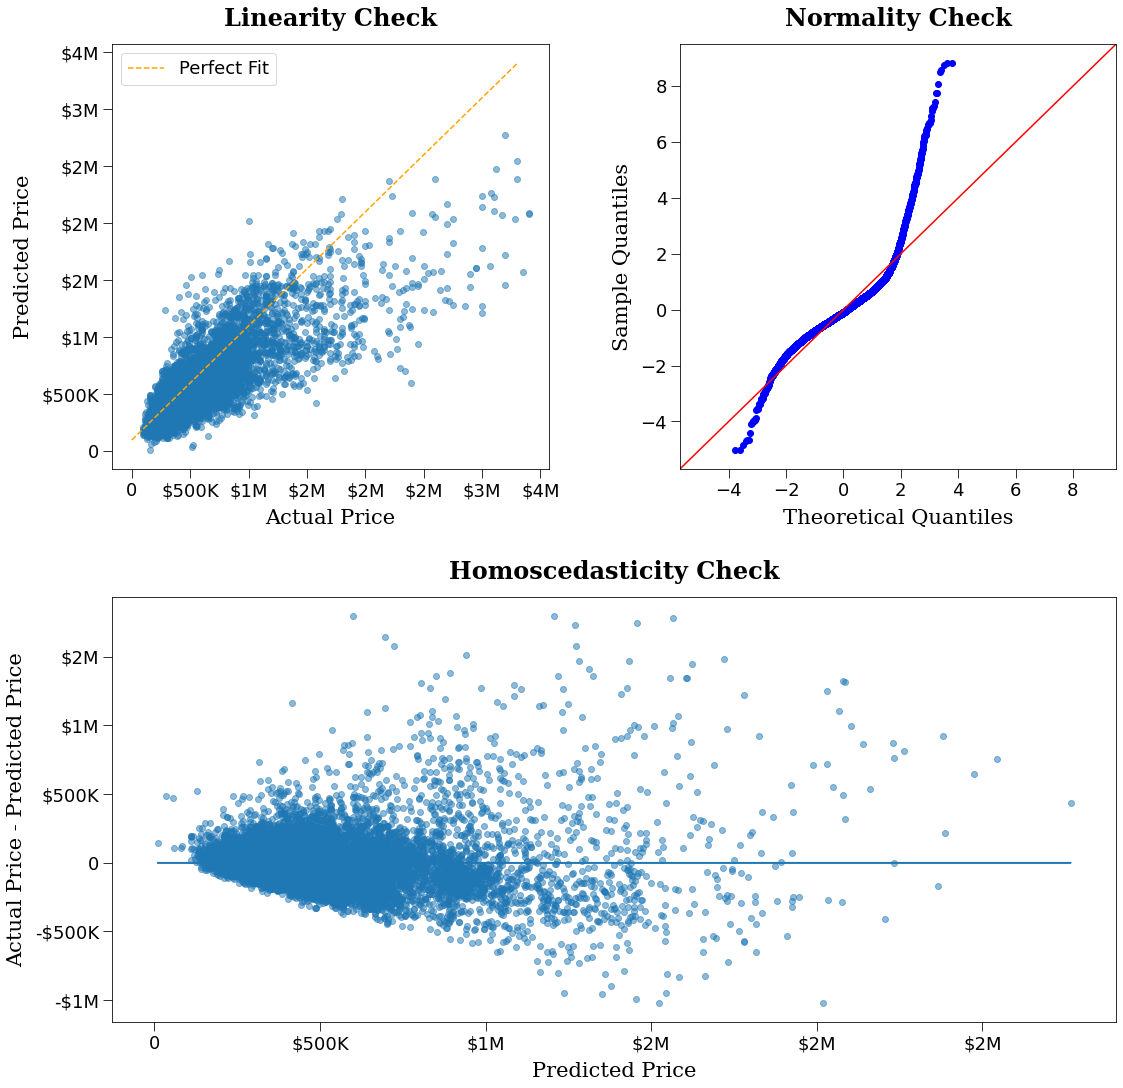

In [120]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

out_seattle_preds = out_seattle_fin_model.predict(out_seattle_fin_const)
perfect_line = np.arange(kc_y_out_seattle.min(), kc_y_out_seattle.max())
out_seattle_resids = (kc_y_out_seattle - out_seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y_out_seattle, out_seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(out_seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(out_seattle_preds, out_seattle_resids, alpha=0.5)
homo_ax.plot(out_seattle_preds, [0 for i in range(len(kc_X_out_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
        
fig.savefig('visuals/out_seattle_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>out_seattle_log_model</code></strong></h4>

In [121]:
# Only log transforming the target (y component)

out_seattle_log_y = np.log(kc_y_out_seattle)

In [122]:
# Creating the log model

out_seattle_log_const = sm.add_constant(kc_X_out_seattle)
out_seattle_log_model = sm.OLS(endog=out_seattle_log_y, exog=out_seattle_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>out_seattle_log_model</code></strong></h5>

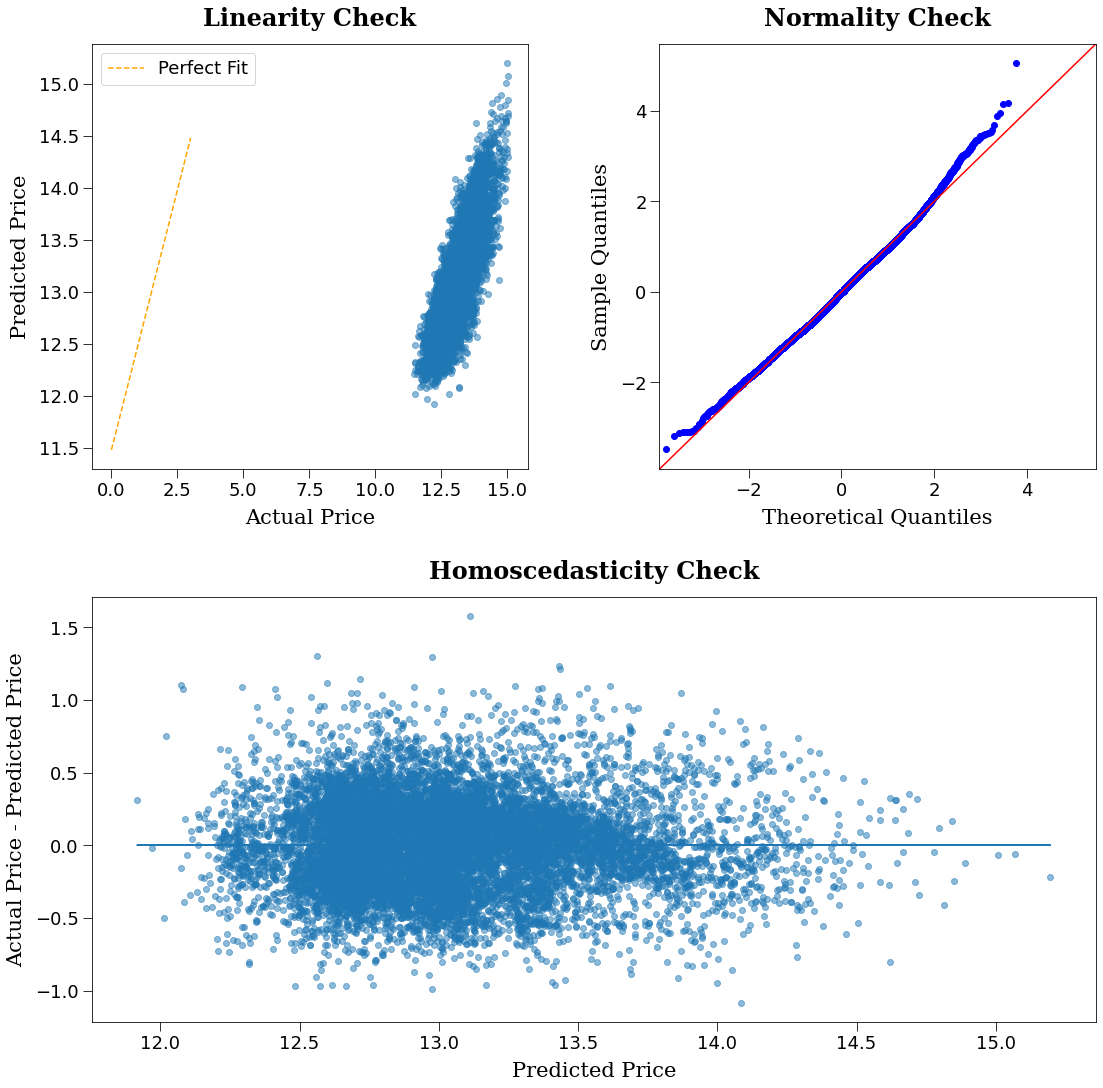

In [123]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

out_seattle_preds = out_seattle_log_model.predict(out_seattle_log_const)
perfect_line = np.arange(out_seattle_log_y.min(), out_seattle_log_y.max())
out_seattle_resids = (out_seattle_log_y - out_seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(out_seattle_log_y, out_seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(out_seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(out_seattle_preds, out_seattle_resids, alpha=0.5)
homo_ax.plot(out_seattle_preds, [0 for i in range(len(kc_X_out_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

fig.savefig('visuals/out_seattle_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>out_seattle</code> Models</strong></h4>

In [124]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

out_seattle_model_list = [out_seattle_base_model, out_seattle_full_model, out_seattle_full_VIF_model, 
                          out_seattle_full_RFECV_model, out_seattle_fin_model, out_seattle_log_model]
out_seattle_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [125]:
# Creating the comparison dataframe

out_seattle_r_vals = {}
out_seattle_r_adj_vals = {}
out_seattle_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(out_seattle_model_list, out_seattle_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    out_seattle_r_vals[model_name] = ols_model.rsquared
    out_seattle_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    out_seattle_compare_params_df = pd.concat([out_seattle_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([out_seattle_r_vals, out_seattle_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    out_seattle_compare_params_df = pd.concat([out_seattle_compare_params_df, r_ser])    

In [126]:
# Rounding columns for readability and displaying the comparision dataframe

for col in out_seattle_compare_params_df.columns[:-1]:
    out_seattle_compare_params_df[col] = out_seattle_compare_params_df[col].round(2)
    
display(out_seattle_compare_params_df)

base        full    full_VIF  full_RFECV         fin  \
const               -88031.96  5303260.77  3853840.11  3853840.11  3833744.19   
sqft_living            274.79      123.54         NaN         NaN         NaN   
sqft_lot                  NaN        0.05        0.22        0.22        0.22   
sqft_living15             NaN       62.57      106.56      106.56      106.58   
sqft_lot15                NaN       -0.34       -0.28       -0.28       -0.28   
yr_built                  NaN    -1883.20    -1965.47    -1965.47    -1955.57   
floors                    NaN   -40054.51   -22720.25   -22720.25   -22744.05   
bedrooms                  NaN   -16266.44     9870.71     9870.71     9844.09   
bathrooms                 NaN    49025.48    91493.09    91493.09    91599.14   
basement                  NaN   -17512.44    10853.73    10853.73    10678.96   
grade_4_Low               NaN -1543148.11  -125008.91  -125008.91  -126802.67   
grade_5_Fair              NaN -1519873.00  -102743.54  -102743.54  -102638.08   
grade_6_Low_Average       NaN -1475054.59   -49826.40   -49826.40   -50094.47   
grade_7_Average           NaN -1423968.57         NaN         NaN         NaN   
grade_8_Good              NaN -1363026.54    77863.08    77863.08    77960.60   
grade_9_Better            NaN -1259303.38   216805.27   216805.27   216932.58   
grade_10_Very_Good        NaN -1104096.79   410132.82   410132.82   410259.96   
grade_11_Excellent        NaN  -878729.10   679204.66   679204.66   679332.52   
grade_12_Luxury           NaN  -613853.53   980638.90   980638.90   980688.91   
view_FAIR                 NaN   196405.16   202173.11   202173.11   202167.86   
view_AVERAGE              NaN    59937.23    69771.18    69771.18    69894.50   
view_GOOD                 NaN    84878.82    86044.89    86044.89    86101.78   
view_EXCELLENT            NaN   346581.44   361802.82   361802.82   361871.44   
waterfront                NaN   590937.62   603787.32   603787.32   603875.95   
condition_Fair            NaN  -143626.72   -30424.62   -30424.62         NaN   
condition_Average         NaN  -118839.26         NaN         NaN         NaN   
condition_Good            NaN   -92365.49    28995.35    28995.35    29565.67   
condition_Very_Good       NaN   -55249.43    68261.31    68261.31    68940.47   
renovated                 NaN   135124.51   144343.04   144343.04   144612.30   
r_score                  0.50        0.67        0.65        0.65        0.65   
r_adj_score              0.50        0.67        0.65        0.65        0.65   

                              log  
const                1.842719e+01  
sqft_living                   NaN  
sqft_lot             6.816040e-07  
sqft_living15        2.274389e-04  
sqft_lot15          -2.290594e-07  
yr_built            -3.261956e-03  
floors               4.164991e-04  
bedrooms             1.699477e-02  
bathrooms            1.290079e-01  
basement             3.585679e-02  
grade_4_Low         -5.420592e-01  
grade_5_Fair        -3.439940e-01  
grade_6_Low_Average -2.070709e-01  
grade_7_Average               NaN  
grade_8_Good         2.043180e-01  
grade_9_Better       4.091594e-01  
grade_10_Very_Good   5.869879e-01  
grade_11_Excellent   7.227831e-01  
grade_12_Luxury      8.356006e-01  
view_FAIR            2.274623e-01  
view_AVERAGE         8.038462e-02  
view_GOOD            6.338750e-02  
view_EXCELLENT       2.528184e-01  
waterfront           4.804759e-01  
condition_Fair                NaN  
condition_Average             NaN  
condition_Good       3.747475e-02  
condition_Very_Good  1.171814e-01  
renovated            1.401436e-01  
r_score              6.499087e-01  
r_adj_score          6.492310e-01

<h4 align='center'><strong>Final <code>out_seattle</code> Equation</strong></h4>

In [127]:
# Taking the pieces of the final equation and making them more readable

out_seattle_log_int = int(np.exp(out_seattle_compare_params_df.log.dropna()[0]))
out_seattle_log_percs = out_seattle_compare_params_df.log.dropna()[1:-2] * 100

In [128]:
# Continuing the process of making the pieces of the equation more readable

out_seattle_fin_percs = list(out_seattle_log_percs.values.astype(int))
out_seattle_fin_preds = list(out_seattle_log_percs.index)

In [129]:
# Creating strings of the pieces of the equation with their column names

out_seattle_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(out_seattle_fin_percs, out_seattle_fin_preds)]

In [130]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(out_seattle_log_int) +' +\n'
model_var_string = ' +\n'.join(out_seattle_perc_eq)

In [131]:
# Putting the final equation together and printing it

out_seattle_log_eq = model_eq + model_int_string + model_var_string

print(out_seattle_log_eq)

price = 100652631 +
0% * sqft_lot +
0% * sqft_living15 +
0% * sqft_lot15 +
0% * yr_built +
0% * floors +
1% * bedrooms +
12% * bathrooms +
3% * basement +
-54% * grade_4_Low +
-34% * grade_5_Fair +
-20% * grade_6_Low_Average +
20% * grade_8_Good +
40% * grade_9_Better +
58% * grade_10_Very_Good +
72% * grade_11_Excellent +
83% * grade_12_Luxury +
22% * view_FAIR +
8% * view_AVERAGE +
6% * view_GOOD +
25% * view_EXCELLENT +
48% * waterfront +
3% * condition_Good +
11% * condition_Very_Good +
14% * renovated


<a id='sect_model_end'></a>

<h2 align='center'><strong>Analyzing Model Performance</strong></h2>

&nbsp;&nbsp;&nbsp;&nbsp;Unfortunately, none of the models I created could truly be relied upon to predict the sales prices of a residential property.
The $𝑟^2$, and the adjusted $𝑟^2$ scores never even broke a value of .7, meaning that the models were not reliable as predictive algorithms.
I could have refined the models further to increase their predictive abilities, but I will discuss why I didn’t in the [Future Investigations](#sect_fut_invest) section.
While the [Insights and Conclusions](#sect_insights_and_conclusions) I gleaned from my analysis are certainly an important first step, more data will need to be gathered if King County Development is to build a regression model that serves as a reliable predictive algorithm.

<a id='sect_stake_biz_decision'></a>

<h1 align='center'><strong>Stakeholder and Business Problem Decision</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;Based on the results obtained through the three models I created, I chose a real estate developer as the stakeholder for this project.
&ensp;While I could have chosen a real estate agency, I felt a developer could make better use of the insights I gained through my analysis.
&ensp;Real estate agencies would be limited by the desires of their client and the physical location of the client’s property.
&ensp;Developers have more freedom in their decision making, both in terms what changes to make to the properties they acquire, and what properties to acquire in the first place.
&ensp;They may ultimately rely on investors to acquire the property, but they will need an analysis like this, to convince those investors of a property’s / design’s value.
&ensp;A real estate developer could also take on clients simply wanting renovations, or even remodeling services.
&ensp;My analysis would just be a step in a process, of course, which I will discuss more in the [Future Investigations](#sect_fut_invest) section.
&ensp;I named my hypothetical client King County Development.

<p align='center'>
    <img src='images/kc_dev_logo.png'>
</p>

&nbsp;&nbsp;&nbsp;&nbsp;For the specific business problem, I chose to provide the real estate developer with key insights into which property features were the most relevant in predicting the sales price, and how much the sales price would be affected by either a one-unit increase in those predictors, or if a property were to have certain categorical features.

<a id='sect_insights_and_conclusions'></a>

<h1 align='center'><strong>Insights and Conclusions</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;By creating the separate models, I was able to gain valuable insights.
&ensp;I created a dataframe and visualiztions with the coefficients of the three log-transformed models to identify the differences between the predictors that were included in each model and their values more easily.
&ensp;I used the visualizations in my presentation to my stakeholder.

<ul style='list-style-type: none;'>
    <li>Intercepts</li>
        <ul>
            <li>The Seattle model had the highest intercept, the entire King County model had the second highest, and the Outside Seattle model had the lowest.</li>
            <li>Seattle Model - &dollar;287,626.85</li>
            <li>Entire King County Model - &dollar;261,735.06</li>
            <li>Outside Seattle Model - &dollar;149,110.47</li>
        </ul>
    <li><code>sqft</code> Columns</li>
        <ul>
            <li>These columns were not important on a per unit basis, but I could still judge them by whether they were included, whether they were positive or negative, and if they were $= 0.02$ in the dataframe / visualizations, or $\approx 0$.</li>
            <li><code>sqft_living</code></li>
                <ul>
                    <li>It was only even included for the prices of residential property inside Seattle, and the fact that it was $0.02$ and positive, showing that living space is very important inside Seattle.</li>
                </ul>
            <li><code>sqft_living15</code></li>
                <ul>
                    <li>It was positive $0.02$, or very important, in all three models.</li>
                </ul>
            <li><code>sqft_lot</code></li>
                <ul>
                    <li>It was positive $\approx 0$ in the entire King County and the Outside Seattle models, and negative $\approx 0$ in the Seattle model, meaning that it was beneficial to the former, and detrimental to the latter, but not as important or harmful as if it was $0.02$.</li>
                </ul>
            <li><code>sqft_lot15</code></li>
                <ul>
                    <li>It was negative $\approx 0$, or detrimental, in all three models.</li>
                </ul>
        </ul>
    <li><code>floors</code></li>
        <ul>
            <li>This was interesting.  It was most important in the entire King County model.  In the Seattle model, it was still important, but in the Outside Seattle model, it was barely important at all.</li>
        </ul>
    <li><code>bedrooms</code></li>
        <ul>
            <li>Another interesting predictor.  It wasn’t even included in the entire King County model, and it actually had a negative effect in the Seattle model.  However, it did have a positive effect in the Outside Seattle model.</li>
        </ul>
    <li><code>bathrooms</code></li>
        <ul>
            <li>It was very important in the entire King County model, and even more so in the Outside Seattle model.  In the Seattle model it was important, especially compared to the previous predictors, but not nearly as much as in the other models.</li>
        </ul>
    <li><code>basement</code></li>
        <ul>
            <li>It wasn’t even included in the Seattle model.  It was very important in the entire King County model. In the Outside Seattle model, it was important, and its worth noting that having a basement adds more value than additional floors outside of Seattle.
        </ul>
    <li><code>grade</code></li> 
        <ul>
            <li>This seems to be the most important feature when determining the price of a property.  The categories in this feature resulted in the largest changes in price, both positively and negatively.   Anything below <code>7_Average</code> had a negative effect if it was included at all, and the lower the <code>grade</code>, the worse the effect, while <code>7_Average</code> itself was not included in any of the models.  Anything above <code>7_Average</code> had a positive effect, and the size of the effect increases as <code>grade</code> does.
            <li><u>Specific Recommendation</u></li>
                <ul>
                    <li>Create a database of example pictures of properties with each <code>grade</code> value (<em>as many as can be gathered</em>)</li>
                    <li>These could be used to guide King County Development as they design new properties, or act as a guide, or as an incentive in any promotional material, for any clients seeking renovation or remodeling services.</li>
                </ul>
        </ul>
    <li><code>view</code></li>
        <ul>
            <li>The <code>FAIR</code> and <code>AVERAGE</code> dummy columns weren’t even included in the Seattle model, while even having a <code>FAIR</code> view was very important in the Outside Seattle model.  It is also important in the entire King County model, although less so.  Having an <code>AVERAGE</code> view added a similar increase in value in both the Outside Seattle and entire King County models, so an <code>AVERAGE</code> view could possibly be the standard / baseline in Seattle, as the <code>grade_7_Average</code> column seemed to be the standard / baseline in the <code>grade</code> column.  It is also especially worth noting how much of increase having an <code>EXCELLENT</code> view has on the price.</li>
            <li><u>Specific Recommendation</u></li>
                <ul>
                    <li>Again, create a database of example pictures of properties with each <code>view</code> value, which could be used for the purposes I've previously described.</li>
                </ul>
        </ul>
    <li><code>waterfront</code></li>
        <ul>
            <li>Having a waterfront property understandably adds significant value to the price, in all three models, and is the most significant in the Outside Seattle model.</li>
        </ul>
    <li><code>condition</code></li>
        <ul>
            <li>The <code>Fair</code> and <code>Average</code> dummy columns weren’t included in any of the models, and the <code>Average</code> column again seemed to be standard / baseline.  Having a <code>condition</code> of <code>Good</code> was slightly more important inside of Seattle, while having a <code>condition</code> of <code>Very_Good</code> was slightly more important outside of Seattle.</li>
            <li><u>Specific Recommendation</u></li>
                <ul>
                    <li>Once again, create a database of example pictures of properties with each <code>condition</code> value, which could be used for the purposes I've previously described.</li>
                </ul>
        </ul>
    <li><code>renovated</code></li>
        <ul>
            <li>An extremely important insight was gained for this predictor.  It wasn’t even included in the Seattle model, and it corresponded to a much smaller increase in value in the entire King County model than in the Outside Seattle model, where it was very important.</li>
        </ul>
    <li><code>yr_built</code></li>
        <ul>
            <li>This was the most difficult predictor to analyze.  In the entire King County model, the effect was negative for each dummy column and, generally, was less negative the further back in time the property was built.  In the Seattle model, the <code>1920s to 1940s</code> dummy column wasn’t even included, neither was the <code>1980s to 2000s</code> in the Outside Seattle model.  Both the Seattle and Outside Seattle models showed that older built properties seemed to be more valuable in general, although the trend was much clearer Outside Seattle.  Just to confirm that there was an overall negative effect as the <code>yr_built</code> increases in each model, I created a <a href='https://github.com/sarnadpy32/king_county_development/blob/master/Phase%202%20-%20Project%20-%20yr_built%20changed.ipynb'>copy of this notebook in which I did not restructure the <code>yr_built</code> column</a>, which confirmed my hypothesis.  I included the <code>yr_built</code> results from the other notebook below.</li>
        </ul>
</ul>

In [132]:
# Taking the `log` column from each of the comparison dataframes, renaming them, and combining them into a
# dataframe to easily compare the results from the three models

kc_log = kc_compare_params_df.log.copy()
seattle_log = seattle_compare_params_df.log.copy()
out_seattle_log = out_seattle_compare_params_df.log.copy()

kc_log.name = 'kc'
seattle_log.name = 'seattle'
out_seattle_log.name = 'out_seattle'

log_compare_df = pd.concat([kc_log, seattle_log, out_seattle_log], axis=1)

log_comp_df = log_compare_df.copy()

log_compare_df = log_compare_df.fillna('-')

In [133]:
# Reformatting the intercept of the model to make it easily understandable

log_compare_df.loc['const'] = log_compare_df.loc['const'].apply(lambda x: np.exp(x)).round(2)

In [134]:
# Reformatting the feature coefficients of the model to make it easily understandable

log_compare_df.iloc[1:-2] = log_compare_df.iloc[1:-2].applymap(lambda x: '{:.2f}%'.format(x*100) if type(x)!=str else x)

In [135]:
# Reformatting the r-squared & the adj r-squared of the model to make it easily understandable

log_compare_df.iloc[-2:] = log_compare_df.iloc[-2:].applymap(lambda x: round(x, 3))

In [136]:
# Uncomment to print the dataframe in markdown appropriate format

# print(log_compare_df.to_markdown(colalign=['center']*4))

&nbsp;&nbsp;&nbsp;&nbsp;You can see the markdown version of the final equation comparison dataframe for the three models from the primary analysis below.

<table align="center" width='99%'>

<tr><td>
    
    
|                         |   kc    |  seattle  |  out_seattle  |
|:-----------------------:| :-------: |:---------:|:-------------:|
|          const          | \$262K |   \$288K   |  \$149K     |
|       sqft_living       |    -    |   0.02%   |       -       |
|        sqft_lot         |  0.00%  |  -0.00%   |     0.00%     |
|      sqft_living15      |  0.02%  |   0.02%   |     0.02%     |
|       sqft_lot15        | -0.00%  |  -0.00%   |    -0.00%     |
|         floors          |  7.98%  |   2.54%   |     0.63%     |
|        bedrooms         |    -    |  -2.88%   |     1.54%     |
|        bathrooms        | 11.02%  |   4.55%   |    12.55%     |
|        basement         | 10.23%  |     -     |     4.35%     |
|       grade_4_Low       | -73.30% |     -     |       -       |
|      grade_5_Fair       | -49.22% |  -41.20%  |    -29.87%    |
|   grade_6_Low_Average   | -27.92% |  -24.59%  |    -19.98%    |
|     grade_7_Average     |    -    |     -     |       -       |
|      grade_8_Good       | 22.32%  |  19.49%   |    20.84%     |
|     grade_9_Better      | 46.68%  |  43.83%   |    41.19%     |
|   grade_10_Very_Good    | 66.68%  |  56.54%   |    60.38%     |
|   grade_11_Excellent    | 84.07%  |  70.60%   |    74.48%     |
|     grade_12_Luxury     | 96.51%  |  118.49%  |    87.52%     |
|        view_FAIR        | 14.42%  |     -     |    21.16%     |
|      view_AVERAGE       |  7.81%  |     -     |     7.95%     |
|        view_GOOD        |  9.71%  |   4.47%   |     6.68%     |
|     view_EXCELLENT      | 25.78%  |  21.45%   |    26.14%     |
|       waterfront        | 30.97%  |  38.10%   |    46.78%     |
|     condition_Fair      |    -    |     -     |       -       |
|    condition_Average    |    -    |     -     |       -       |
|     condition_Good      |  5.17%  |   7.05%   |     4.91%     |
|   condition_Very_Good   | 11.36%  |  10.24%   |    13.25%     |
|        renovated        |  4.28%  |     -     |    16.26%     |
| yr_built_1920_to_1940_s | -5.18%  |     -     |    14.54%     |
| yr_built_1940_to_1960_s | -19.28% |  -14.83%  |    25.79%     |
| yr_built_1960_to_1980_s | -39.73% |  -32.14%  |     8.78%     |
| yr_built_1980_to_2000_s | -49.49% |  -30.39%  |       -       |
| yr_built_2000_to_2020_s | -45.60% |  -34.17%  |     2.79%     |
|         r_score         |  0.645  |   0.698   |     0.656     |
|       r_adj_score       |  0.645  |   0.697   |     0.655     |
    
</td></tr> 
</table>

&nbsp;&nbsp;&nbsp;&nbsp;You can see the markdown version of the `yr_built` results from the final equation comparison dataframe for the three models from the <a href='https://github.com/sarnadpy32/king_county_development/blob/master/Phase%202%20-%20Project%20-%20yr_built%20changed.ipynb'>secondary analysis</a> below.
&ensp;In that version, in case you didn’t catch my reason for creating a secondary analysis, I performed an analysis without transforming the `yr_built` feature into a categorical feature.

<table align="center" width='99%'>
  <tr valign="middle">
    <td>


|          |   kc   |  seattle  |  out_seattle  |
|:--------:|:------:|:---------:|:-------------:|
| yr_built | -0.58% |  -0.44%   |    -0.32%     |
        
        
  </td>
  </tr>
</table>

<h2 align='center'><strong>Visualizations of the Coefficients of the Three Log Models</strong></h2>

In [137]:
# Printing the original column lists to see how to group the columns accordingly when I created the visualizations 

print(bold_red +'num_cols:'+ every_off, num_cols)
print(bold_red +'new_cat_order:'+ every_off, new_cat_order)

num_cols: ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built', 'floors', 'bedrooms', 'bathrooms']
new_cat_order: ['basement', 'grade', 'view', 'waterfront', 'condition', 'renovated', 'city']


In [138]:
# Splitting the columns into appropriate lists

sqft_cols = num_cols[:4]
fl_bed_bath_base_cols = num_cols[4:] + ['basement']
perc_groups = \
[sqft_cols, fl_bed_bath_base_cols, ['grade'], ['view', 'waterfront'], ['condition', 'renovated'], ['yr_built']]

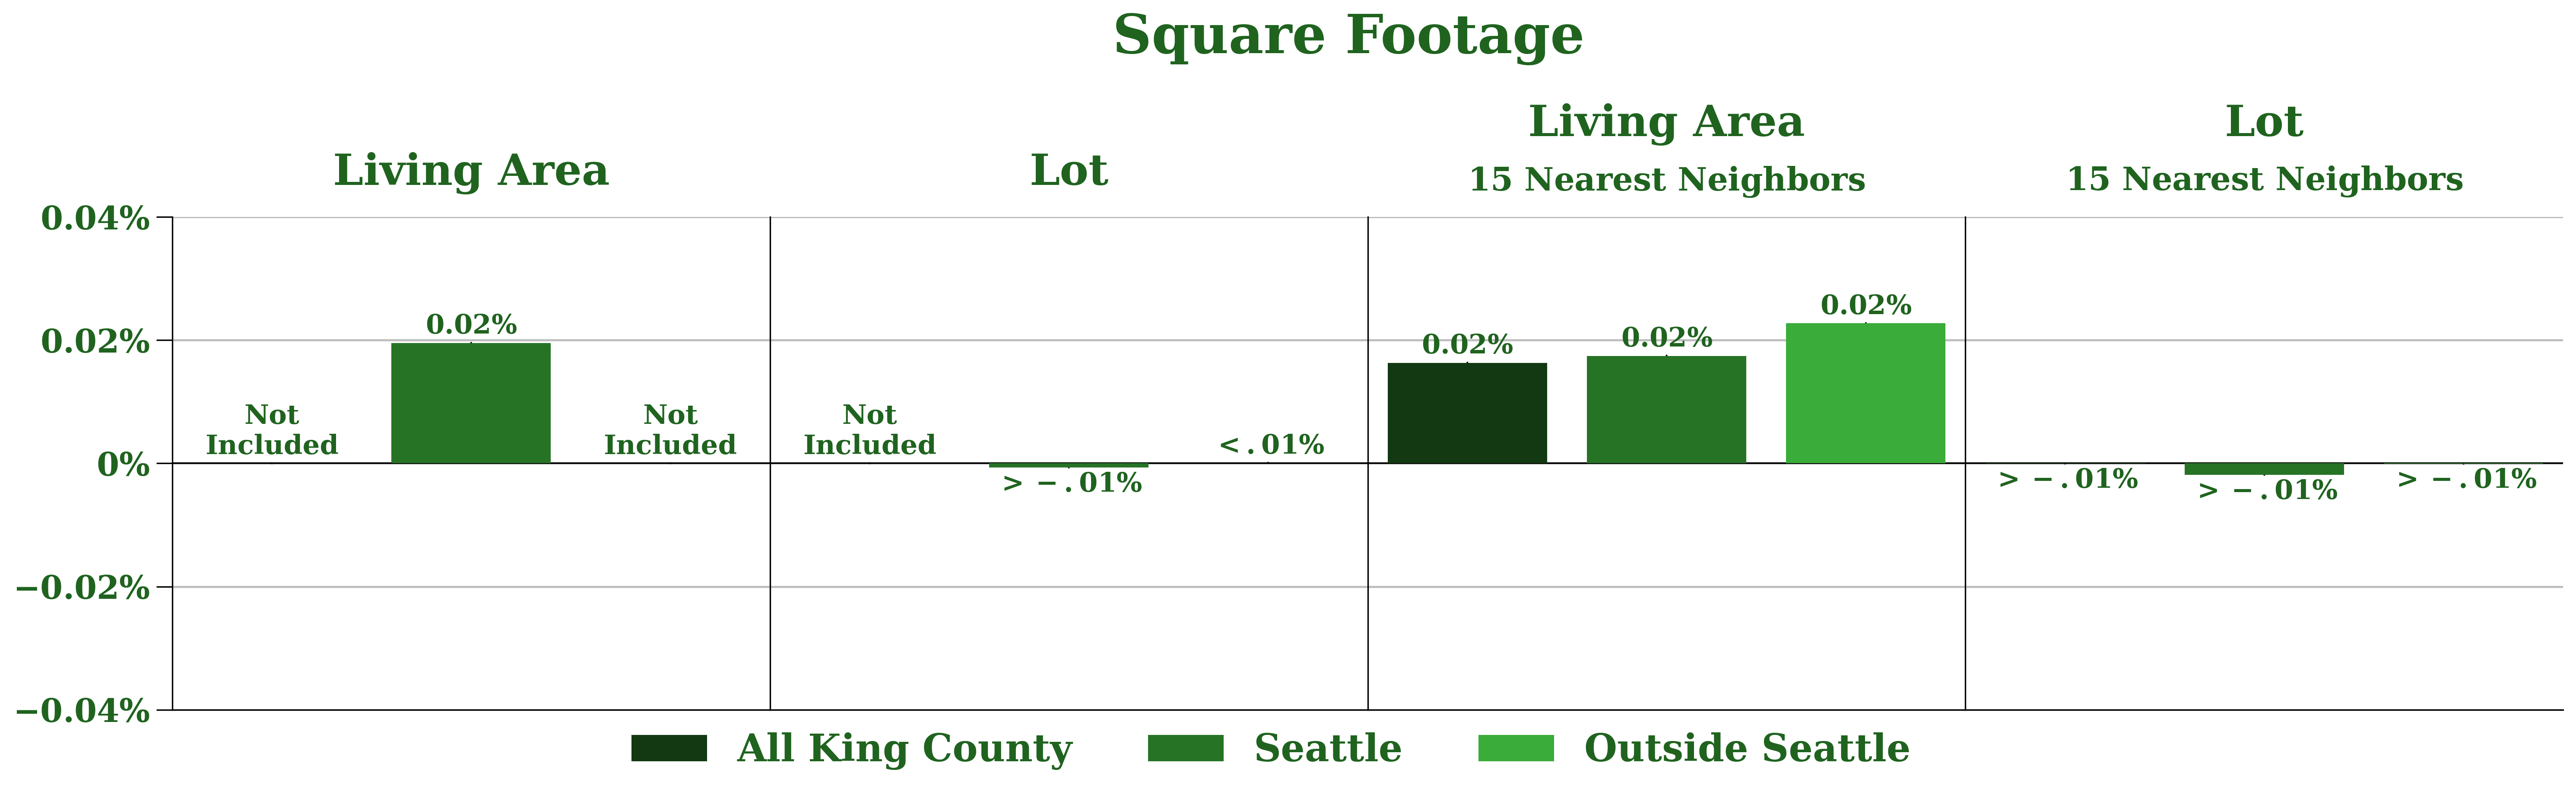

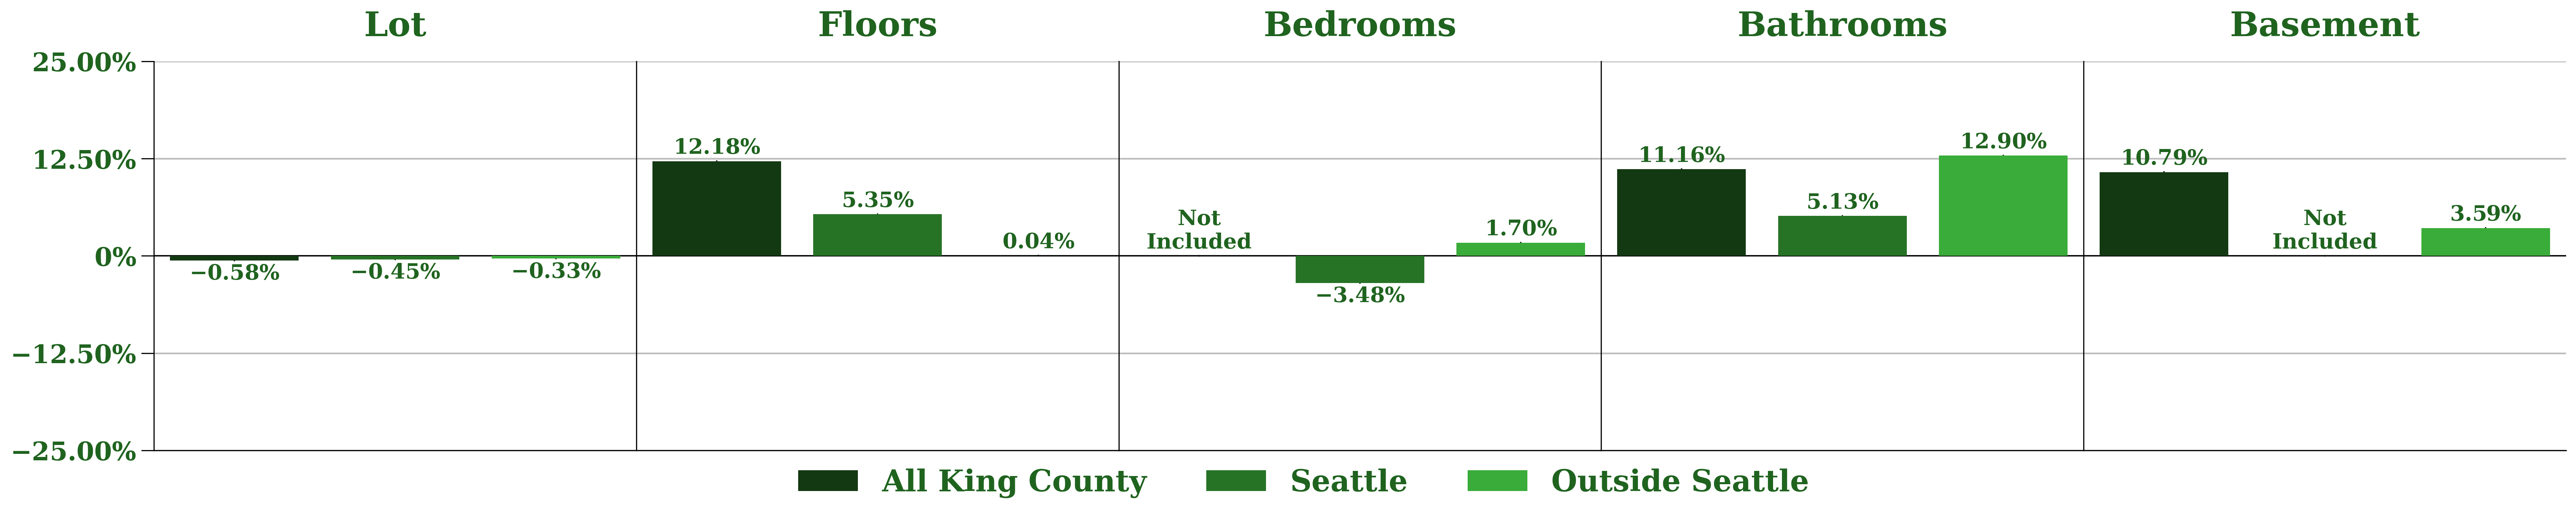

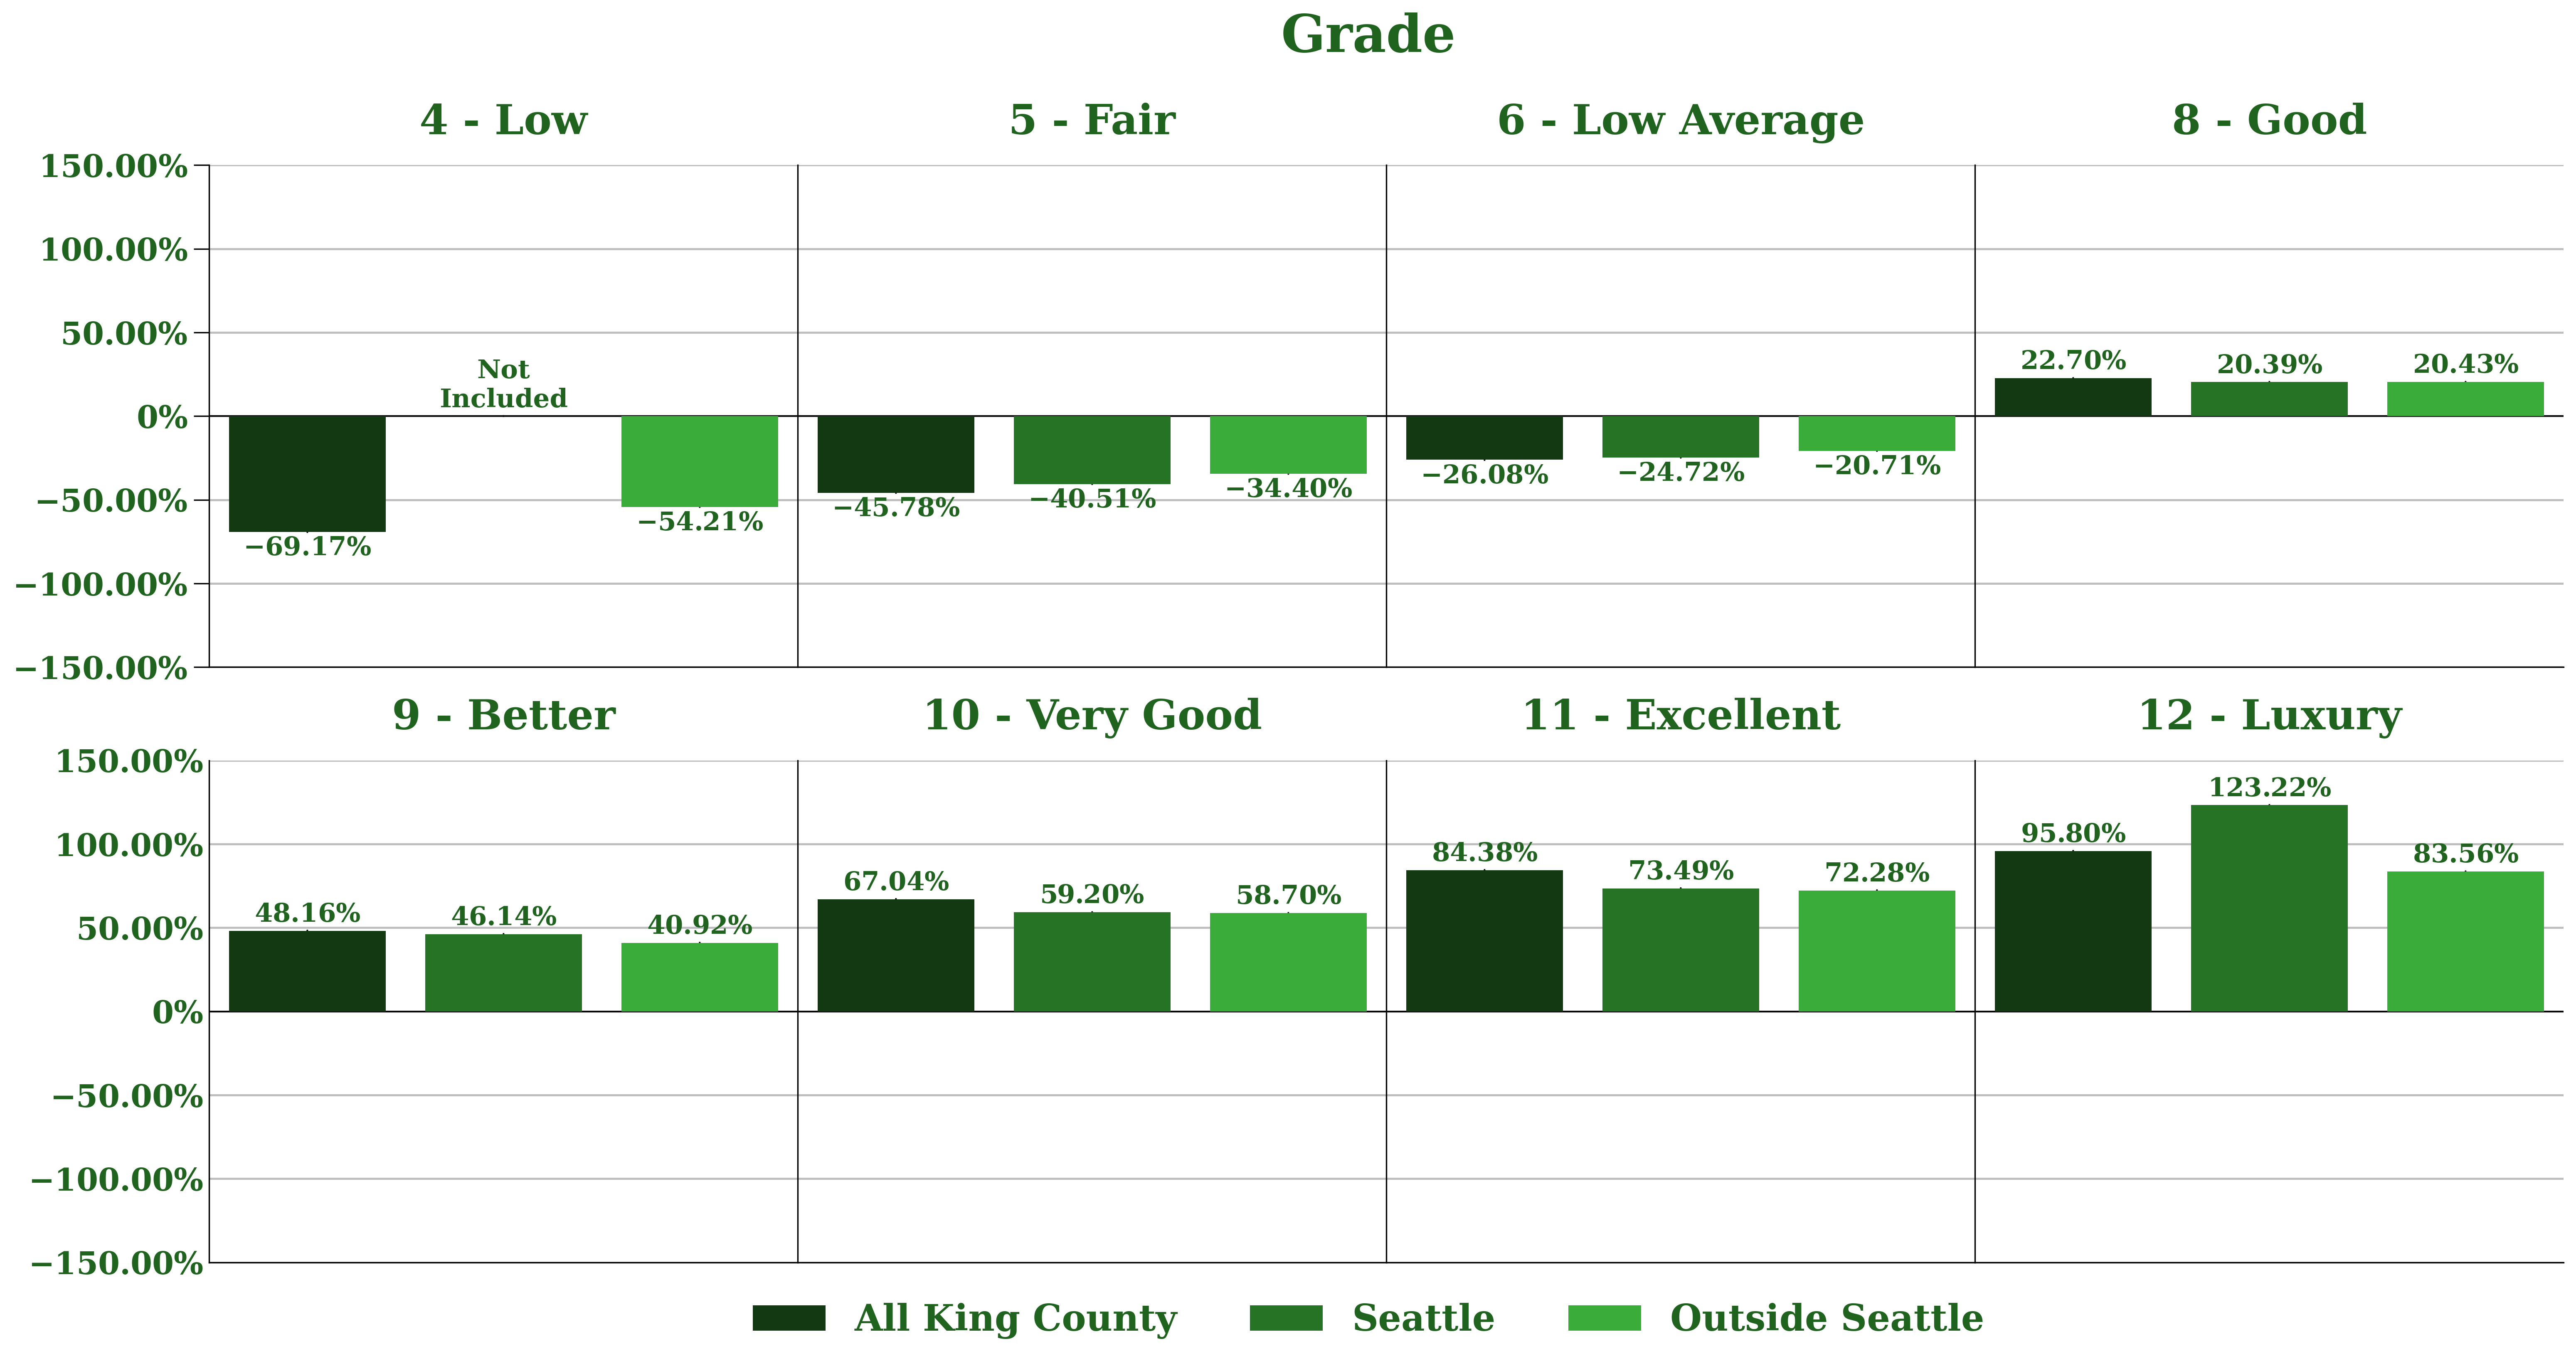

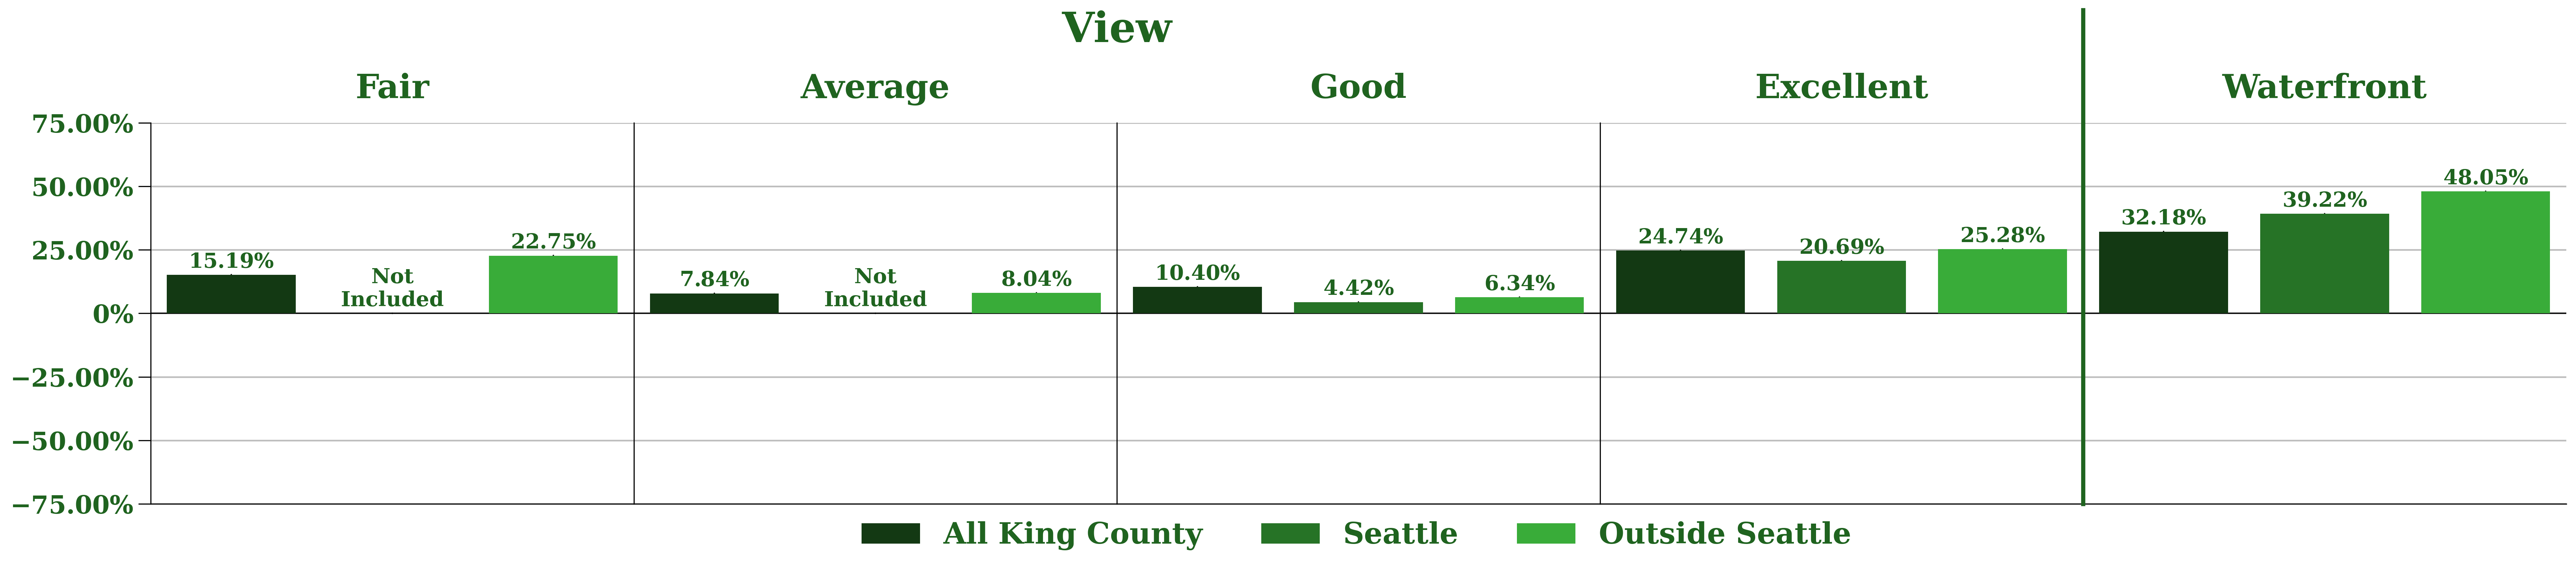

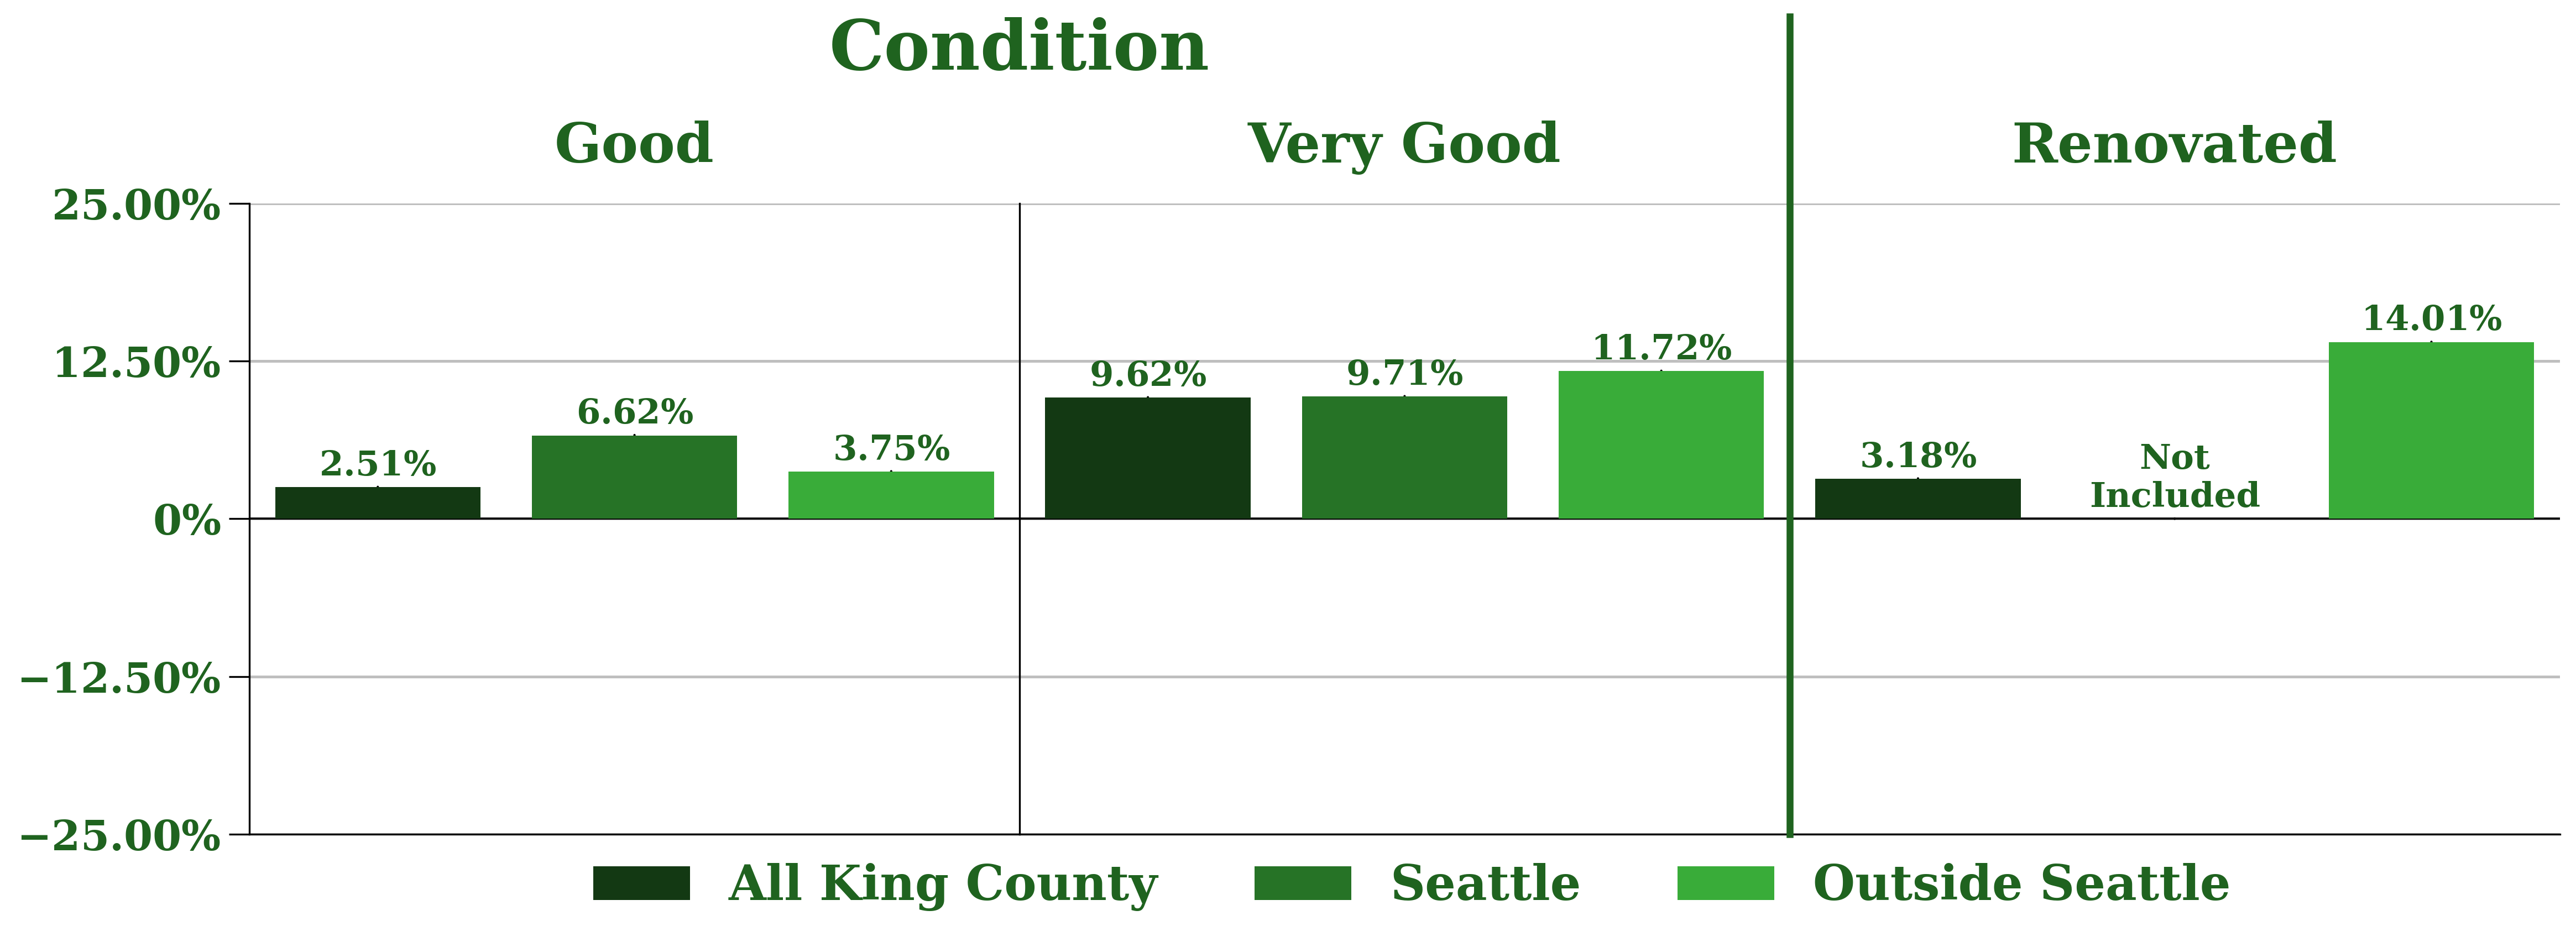

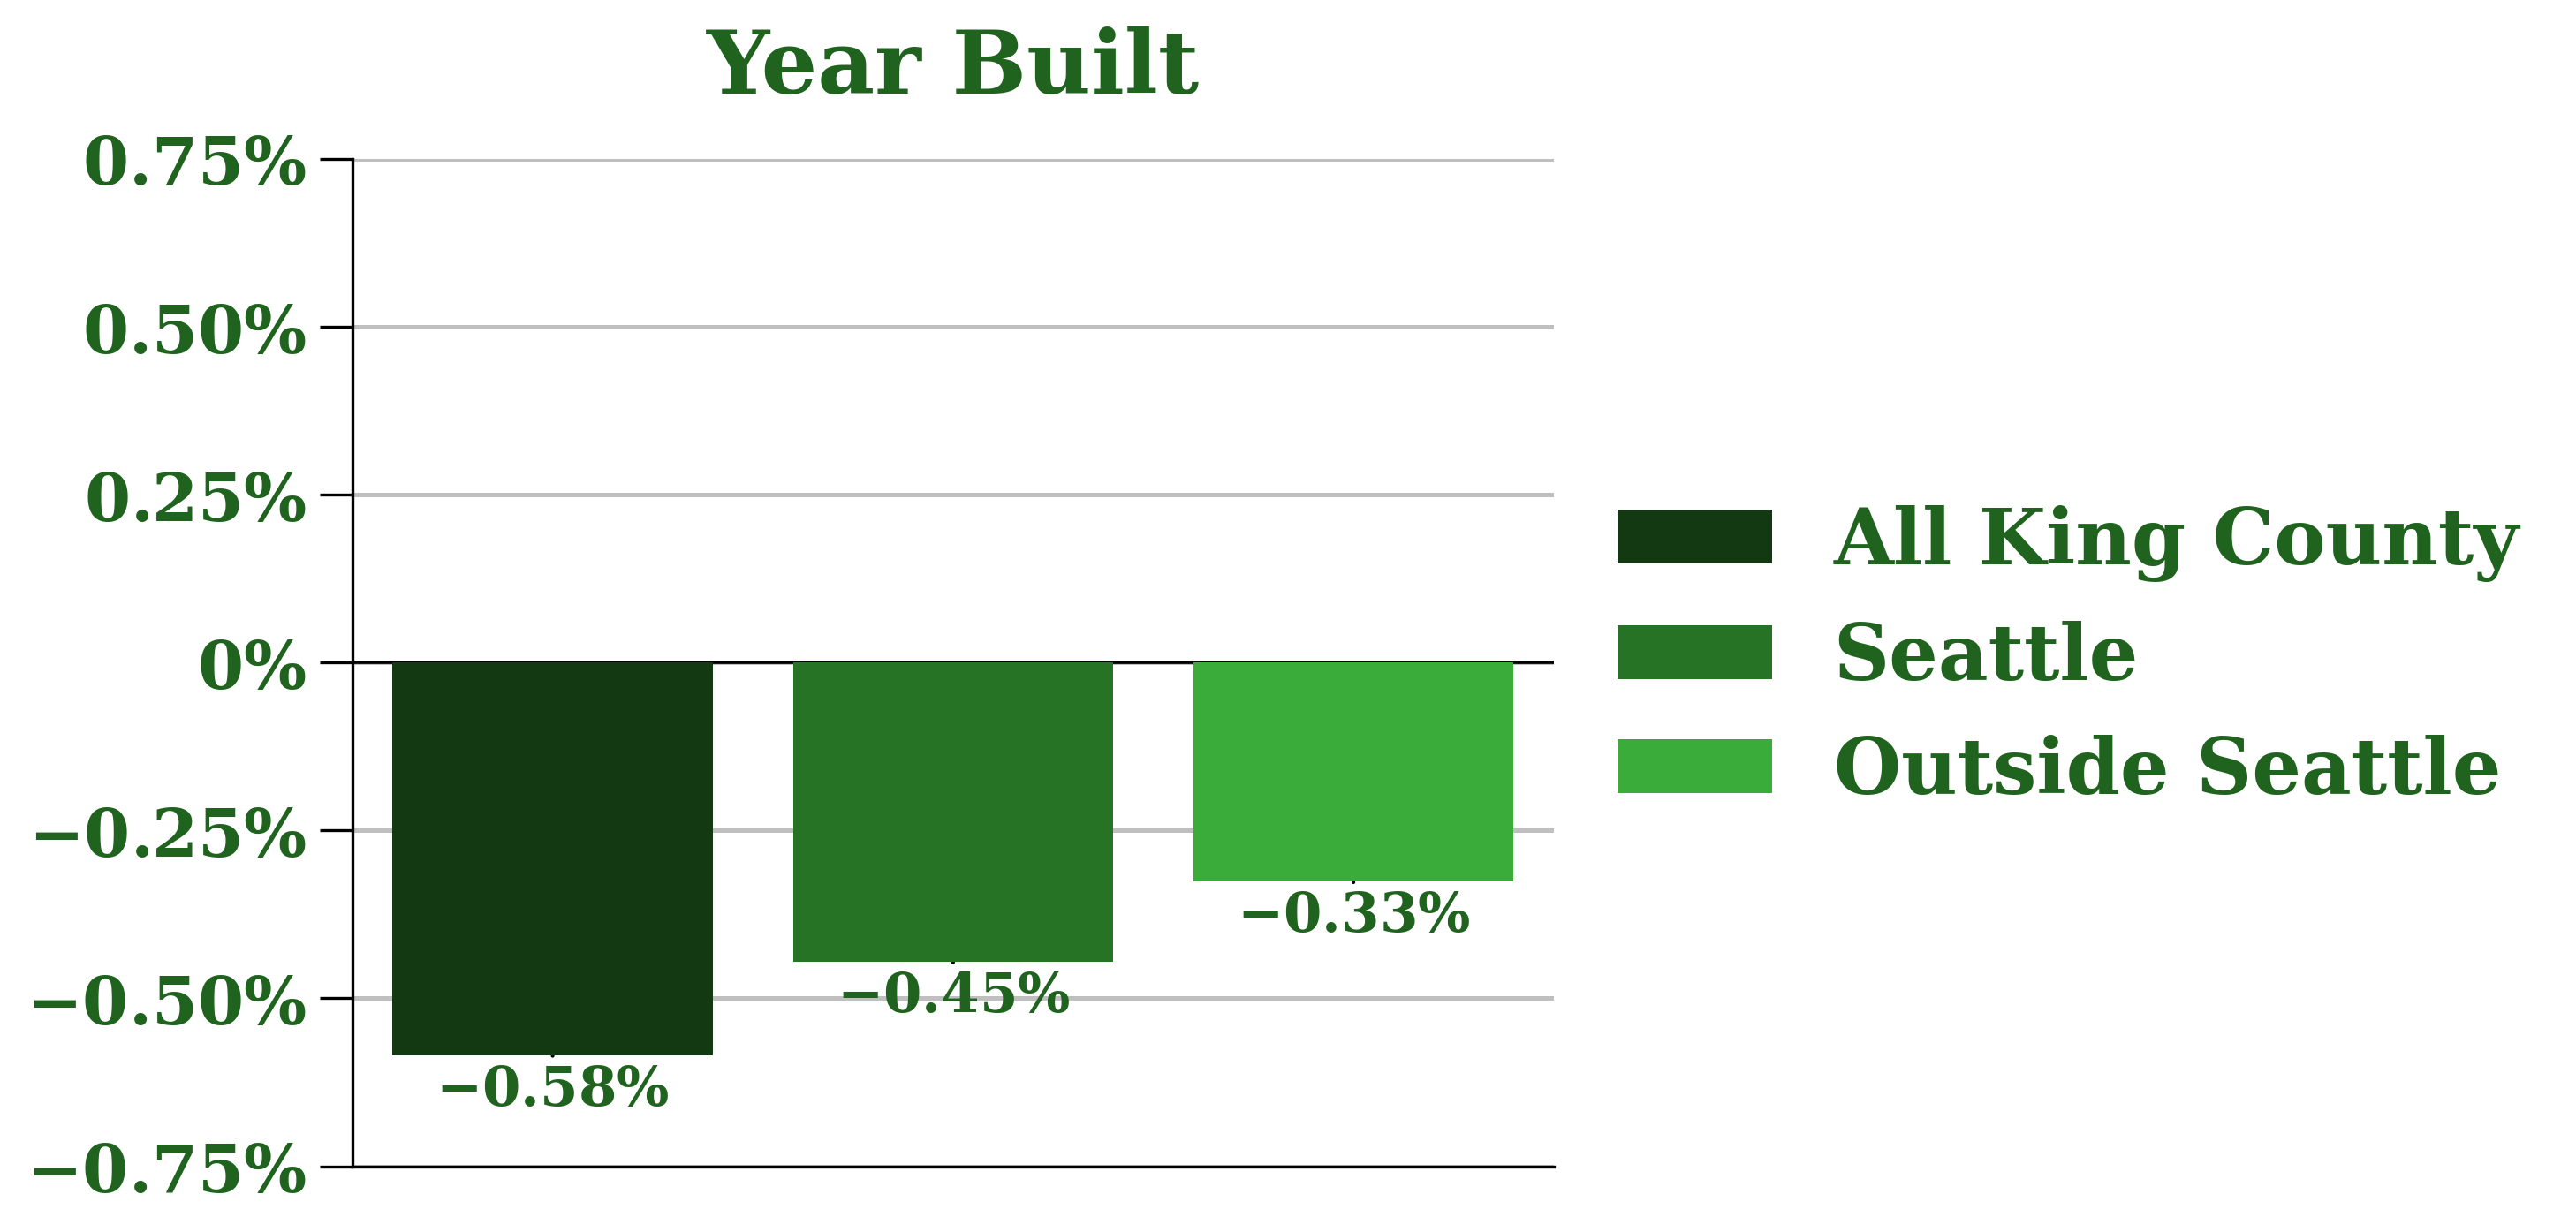

In [139]:
# I iterated thru the lists I created and created an appropriate dataframe for each situation

for p_i, perc_group in enumerate(perc_groups):
    
    # As I planned to show the visualizations I created to my stakeholder, I wanted to control the details precisely
    # This meant changing things depending on the group, such as the title, xlim, ylim, xticks, yticks, and the
    # labels for the bars
    #-------------------------------------------------------------------------------------------------
    if 'grade' in perc_group or 'view' in perc_group or 'condition' in perc_group or 'yr_built' in perc_group:
        r_col = 'grade' if 'grade' in perc_group else 'view' if 'view' in perc_group \
                else 'condition' if 'condition' in perc_group else 'yr_built'
        
        plot_df = log_comp_df.loc[log_comp_df.index.map(lambda x: r_col in x or x in perc_group)]
        
    else: plot_df = log_comp_df.loc[perc_group]
    
    plot_df = plot_df.dropna(how='all')
    
    p_min = plot_df.min(axis=1).max()
    p_max = plot_df.max(axis=1).max()
    p_idx = plot_df.index
    
    plot_df = plot_df.reset_index().rename(columns={'index': 'cat_col'})
    
    c_wrap = 5 if len(plot_df) % 5 == 0 else 4 if len(plot_df) % 4 == 0 else 3
    sep_x = 0
        
    g = sns.catplot(col='cat_col', data=plot_df, saturation=.5, kind="bar", ci=None, col_wrap=c_wrap, 
                    palette=[get_lighter_color(c, .09) for c in [(0, .3, 0), (0, .6, 0), (0, .9, 0)]])
    
    g.fig.dpi = 300
    g.fig.subplots_adjust(wspace=0)

    for p_col in p_idx:
        p_ax = g.axes_dict[p_col]
        
        # Tick and Lim customization 
        #-------------------------------------------------------------------------------------------------
        if p_i==0: p_lim, p_step = .0011, .0001
        elif p_i==5: p_lim, p_step = .0076, .0025
        else: p_lim, p_step = 1.5, .25
            
        p_m = [m for m in np.arange(0, p_lim, p_step) if m >= np.abs(p_min) and m >= p_max]        
        if p_m: 
            p_m = p_m[0]
            
            if p_m==.25 or p_i==5: 
                if p_m==.25: p_step = .125
                p_ax.set_ylim(-p_m, p_m)
                
            else: p_ax.set_ylim(-p_m - p_step, p_m + p_step)
            
            if p_i not in [0, 5]:
                if p_m==.25: ticks = np.arange(0, p_m + .01, p_step)
                elif p_i==2: ticks = np.arange(0, 1.51, .5)
                else: ticks = np.arange(0, p_m + p_step + .01, p_step)
                    
                ticks = np.append(np.delete(np.flip(ticks), -1) * -1, ticks)
                p_ax.yaxis.set_ticks(ticks)
        
        # Bar label customization
        #-------------------------------------------------------------------------------------------------
        p_rects = p_ax.findobj(mpatches.Rectangle)[:-1]
        for rect in p_rects:
            rect.set_zorder(9)
            r_val, r_wid = rect.get_height(), rect.get_width()
            r_x = rect.get_xy()[0] + (r_wid / 2)
            
            annot_kws = dict(textcoords='offset pixels', size=15, ha='center', arrowprops={'arrowstyle': '-'}, 
                             family='serif', color=(.12, .39, .12), weight='bold')
            
            if np.isnan(r_val): 
                p_ax.annotate('Not\nIncluded', xy=(r_x, 0), xytext=(0, 9), va='bottom', **annot_kws) 
            else:
                if r_val > 0: r_low, r_off, r_va = '<.01', 9, 'bottom'
                if r_val < 0: r_low, r_off, r_va = '>-.01', -9, 'top'
                
                if round(np.abs(r_val), 4) < .0001: r_text = '$\mathbf{'+ r_low +'\%}$' 
                elif r_val==0: r_text = '$\mathbf{0\&}$'
                else: r_text = '$\mathbf{'+'{:.2f}'.format(round(r_val, 4) * 100) +'\%}$'
                
                p_ax.annotate(r_text, xy=(r_x, r_val), xytext=(0, r_off), va=r_va, **annot_kws)
        
        # Title customization
        #-------------------------------------------------------------------------------------------------
        if '_' in p_col:
            p_col_list = p_col.split('_')
            
            if p_i==0:
                fig_tit = 'Square Footage'
                if '15' not in p_col_list[1]: 
                    if 'living' in p_col: p_ax_tit = p_col_list[1].title() +' Area'
                    else: p_ax_tit = p_col_list[1].title()
                else: 
                    if 'living' in p_col: p_ax_tit = p_col_list[1][:-2].title() +' Area'
                    else: p_ax_tit = p_col_list[1][:-2].title()
                    
            if p_i!=0 and p_i!=5: 
                fig_tit = p_col_list[0].title()
                if p_i==2: 
                    if len(p_col_list)==4: p_ax_tit = ' - '.join(p_col_list[1:3]) +' '+ p_col_list[3]
                    else: p_ax_tit = ' - '.join(p_col_list[1:])
                if p_i==3: p_ax_tit = p_col_list[1].title()
                if p_i==4: 
                    if p_col=='Good': p_ax_tit = p_col_list[1]
                    else: p_ax_tit = ' '.join(p_col_list[1:])   
                        
            if p_i==5: p_ax_tit = 'Year Built'

        if '_' not in p_col: p_ax_tit = p_col.title()
        
        # Settings that were basically the same for all the visualizations
        #-------------------------------------------------------------------------------------------------
        p_ax.axhline(0, color='k', lw=.9)
        p_ax.yaxis.set_major_formatter(viz_percentage_formatter)
        plt.setp(p_ax.get_yticklabels(), weight='bold', color=(.12, .39, .12))
        p_ax.tick_params('x', length=0, labelbottom=False)
        p_ax.grid(True, 'major', 'y', lw=1.2, alpha=.81)
        if p_col!=p_idx[0]: p_ax.tick_params('y', length=0)
        
        if p_col not in ['sqft_living15', 'sqft_lot15']: p_ax.set_title(p_ax_tit, family='serif', color=(.12, .39, .12))
        else: 
            p_tit = p_ax.set_title(p_ax_tit, family='serif', color=(.12, .39, .12), pad=45)
    
            renderer = g.fig.canvas.get_renderer()
            p_txt_x_max, p_txt_x_min = p_tit.get_tightbbox(renderer).max[0], p_tit.get_tightbbox(renderer).min[0]
            p_txt_x = ((p_txt_x_max - p_txt_x_min) / 2) + p_txt_x_min
            p_txt_y = p_tit.get_tightbbox(renderer).min[1]
            p_txt_x, p_txt_y = g.fig.transFigure.inverted().transform((p_txt_x, p_txt_y))
            
            p_txt = '$\mathbf{15}$ Nearest Neighbors'
            g.fig.text(p_txt_x, p_txt_y - .03, p_txt, size=18, family='serif', weight='bold', ha='center', va='top',
                       color=(.12, .39, .12))
        
        # I also wanted to add divsion lines to separate the visualizations that were not necessarily the same but 
        # they belonged in the same group, which I set up along the way, as well as a title customization
        #-------------------------------------------------------------------------------------------------
        if p_i in [3, 4]: 
            tit_i, sep_i = 1 if p_i==3 else 0, len(plot_df) - 2
            
            if p_col==list(g.axes_dict.keys())[tit_i]: 
                fig_tit_x = g.fig.transFigure.inverted().transform(p_ax.get_tightbbox(renderer).max)[0]
            if p_col==list(g.axes_dict.keys())[sep_i]: 
                sep_x_1 = g.fig.transFigure.inverted().transform(p_ax.get_tightbbox(renderer).max)[0]
                sep_y = g.fig.transFigure.inverted().transform(p_ax.get_tightbbox(renderer).min)[1] - .0005
            if p_col==list(g.axes_dict.keys())[sep_i + 1]: 
                sep_x_2 = g.fig.transFigure.inverted().transform(p_ax.get_tightbbox(renderer).min)[0]
                sep_x = ((sep_x_2 - sep_x_1) / 2) + sep_x_1
    
    # Legend Details
    #-------------------------------------------------------------------------------------------------
    fig_box = g.fig.dpi_scale_trans.transform((g.fig.get_tightbbox(renderer).width, g.fig.get_tightbbox(renderer).height))
    fig_hlf = g.fig.transFigure.inverted().transform(fig_box)[0] / 2
    
    leg_txts = ["All King County", "Seattle", "Outside Seattle"]
    leg_txt_prop = dict(family='serif', weight='bold', size=21)
    leg_x = fig_hlf if p_i<4 else fig_hlf + .015 if p_i==4 else fig_hlf + .03
    
    if p_i!=5: 
        g.fig.legend(p_rects, leg_txts, loc=8, bbox_to_anchor=(leg_x, -.03), ncol=3, prop=leg_txt_prop, 
                     labelcolor=(.12, .39, .12), frameon=False)
    else:
        g.fig.legend(p_rects, leg_txts, loc=6, bbox_to_anchor=(fig_hlf*2, .5), prop=leg_txt_prop, 
                     labelcolor=(.12, .39, .12), frameon=False)
    
    # Title Details
    #-------------------------------------------------------------------------------------------------
    if p_i not in [1, 5]:
        sup_x = fig_hlf
        if p_i==0: sup_x, sup_y = sup_x + .03, 1.11
        elif p_i==2: sup_y = 1.02
        elif p_i in [3, 4]: sup_x = fig_tit_x
        else: sup_y = 1.05
            
        g.fig.suptitle(r''+ fig_tit +'', x=sup_x, y=sup_y, size=30, family='serif', weight='bold', va='bottom',
                       color=(.12, .39, .12))
    
    # Division Lines
    #-------------------------------------------------------------------------------------------------
    fig_box = g.fig.dpi_scale_trans.transform((g.fig.get_tightbbox(renderer).width, g.fig.get_tightbbox(renderer).height))
    fig_hght = g.fig.transFigure.inverted().transform(fig_box)[1]
    if p_i in [3, 4]: 
        g.fig.add_artist(mlines.Line2D([sep_x, sep_x], [sep_y, fig_hght], lw=3, color=(.12, .39, .12)))
    
    # Only saving the `yr_built` visualization
    #-------------------------------------------------------------------------------------------------
    if p_i==5: g.fig.savefig('visuals/presentation_pic_'+ str(p_i + 1) +'_special' , bbox_inches='tight')

<h2 align='center'><strong><code>yr_built</code> Results from the <a href='https://github.com/sarnadpy32/king_county_development/blob/master/Phase%202%20-%20Project%20-%20yr_built%20changed.ipynb'>Secondary Analysis</a></strong></h2>

<p align='center'>
    <img src='visuals/presentation_pic_6_special.png'>
</p>

<a id='sect_fut_invest'></a>

<h1 align='center'><strong>Future Investigations</strong></h1>

&nbsp;&nbsp;&nbsp;&nbsp;Besides the picture databases I mentioned regarding the `grade`, `view`, and `condition` features, there is a lot more work that King County Development will need to perform if they want to be profitable, efficient in their spending, and if they want to provide the highest quality services to their clients and / or investors.
&ensp;There is more valuable information that can no doubt be gleaned from the dataset that was provided to me for this project, including testing interactions and / or building polynomial regression models, but the dataset only covered one year’s worth of sales, so any further investigation would still be limited.

&nbsp;&nbsp;&nbsp;&nbsp;A much larger dataset, possibly with even more predictors to build models with, can undoubtedly be <a href='https://kingcountyexec.govqa.us/WEBAPP/_rs/'>obtained</a>.
&ensp;Data on commercial property could also be gathered.
&ensp;At that point there should be enough data to build separate models for each city in King County, and to also analyze the various ZIP codes within each city.
&ensp;They should then develop maps of each city and / or ZIP code, separated with the appropriate zoning laws, to see what is even possible in every inch of King County.

&ensp;Areas of high potential should be identified, and the owners of any potentially lucrative properties should be approached to gauge their interest in either their property being acquired, or if they are at least interested in any renovation or remodeling services.
&ensp;If not, King County Development will at least be fully prepared should any enticing properties become available, or if they are approached for their other services.
&ensp;The image below is from a <a href='https://www.youtube.com/watch?v=ZeRd3aurWz8'>video</a> from the <a href='https://www.youtube.com/c/RealEstateforNoobs'>Real Estate for Noobs</a> YouTube channel, and the steps that it shows is still only one small piece of the puzzle when it comes to real estate development.

<p align='center'>
    <img src='images/rd_dev_video_still.png'>
</p>